**Structural Equation Modeling (SEM)** is a statistical technique used to analyze complex relationships between observed and latent variables. It combines regression, factor analysis, and path analysis to model and test theoretical relationships.

### Key Features:
1. **Latent Variables**: Unobserved variables inferred from data (e.g., attitudes, satisfaction).
2. **Path Analysis**: Models cause-and-effect relationships.
3. **Measurement Model**: Validates indicators for latent variables.
4. **Direct & Indirect Effects**: Estimates both direct and mediated effects.
5. **Model Fit**: Assesses how well the model fits the data using fit indices like Chi-square and RMSEA.

### Applications in Agriculture:
- **Crop Yield**: SEM can model the relationship between soil quality (latent), fertilizer use (observed), and crop yield (observed).
- **Sustainable Practices**: Analyzes how farmers' knowledge (latent) influences sustainable farming practices (observed) and environmental impact (observed).
- **Climate Impact**: Studies the effects of temperature, rainfall, and soil pH (latent) on crop growth (observed).
- **Pest Control**: Examines how pest control methods (observed) influence crop health, mediated by factors like soil health (latent).

### Example:
SEM can model the relationship between soil health (latent), irrigation (observed), and crop yield (observed), helping to understand both direct and indirect effects.

In short, SEM helps analyze complex causal relationships in agriculture, guiding decision-making by identifying key influencing factors.

# Use Case 1: Crop Modeling and Soil-Crop Interaction
Objective: Analyze the interaction between different soil qualities, weather conditions, and crop growth to optimize crop yield.

## Crop Yield Prediction with Soil and Climate Factors (Including Latent Variables)

In [47]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100000

# Generate climate-related features
temperature = np.random.normal(20, 5, n_samples)  # Average temperature in Celsius
rainfall = np.random.normal(300, 50, n_samples)   # Rainfall in mm
humidity = np.random.normal(60, 10, n_samples)    # Humidity percentage

# Generate soil-related features
soil_ph = np.random.normal(6.5, 0.5, n_samples)    # Soil pH level
nitrogen = np.random.normal(50, 15, n_samples)     # Nitrogen content in mg/kg
phosphorus = np.random.normal(30, 10, n_samples)   # Phosphorus content in mg/kg
potassium = np.random.normal(40, 12, n_samples)    # Potassium content in mg/kg

# Latent variables (simulated indirectly)
soil_health = 0.3 * soil_ph + 0.4 * nitrogen + 0.3 * potassium + np.random.normal(0, 5, n_samples)
climate_stress = 0.5 * (temperature - 22) + 0.3 * (humidity - 55) + np.random.normal(0, 3, n_samples)

# Wheat yield influenced by both observed and latent variables
yield_kg_per_hectare = (
    1000 + 5 * rainfall - 10 * climate_stress + 20 * soil_health + np.random.normal(0, 50, n_samples)
)

# Combine into a DataFrame
df = pd.DataFrame({
    'Temperature_C': temperature,
    'Rainfall_mm': rainfall,
    'Humidity_percent': humidity,
    'Soil_pH': soil_ph,
    'Nitrogen_mg_per_kg': nitrogen,
    'Phosphorus_mg_per_kg': phosphorus,
    'Potassium_mg_per_kg': potassium,
    'Soil_Health_Index': soil_health,
    'Climate_Stress_Index': climate_stress,
    'Wheat_Yield_kg_per_hectare': yield_kg_per_hectare
})

# Save to CSV
df.to_csv('G:/venv/wheat_crop_data.csv', index=False)

# Display first few rows
print(df.head())


   Temperature_C  Rainfall_mm  Humidity_percent   Soil_pH  Nitrogen_mg_per_kg  \
0      22.483571   351.529729         75.618407  5.800089           95.531387   
1      19.308678   242.232262         59.057717  6.773911           47.778526   
2      23.238443   328.771860         46.704644  6.439619           24.023636   
3      27.615149   269.038077         46.113619  6.358368           57.725588   
4      18.829233   283.629860         56.573492  6.883785           49.043884   

   Phosphorus_mg_per_kg  Potassium_mg_per_kg  Soil_Health_Index  \
0             19.369751            61.914828          57.138277   
1             21.797481            38.677677          33.551800   
2             36.832299            31.271874          21.465498   
3             34.178992            35.671938          38.353765   
4             34.224583            57.276527          38.907177   

   Climate_Stress_Index  Wheat_Yield_kg_per_hectare  
0              8.456550                 3946.516502  
1 

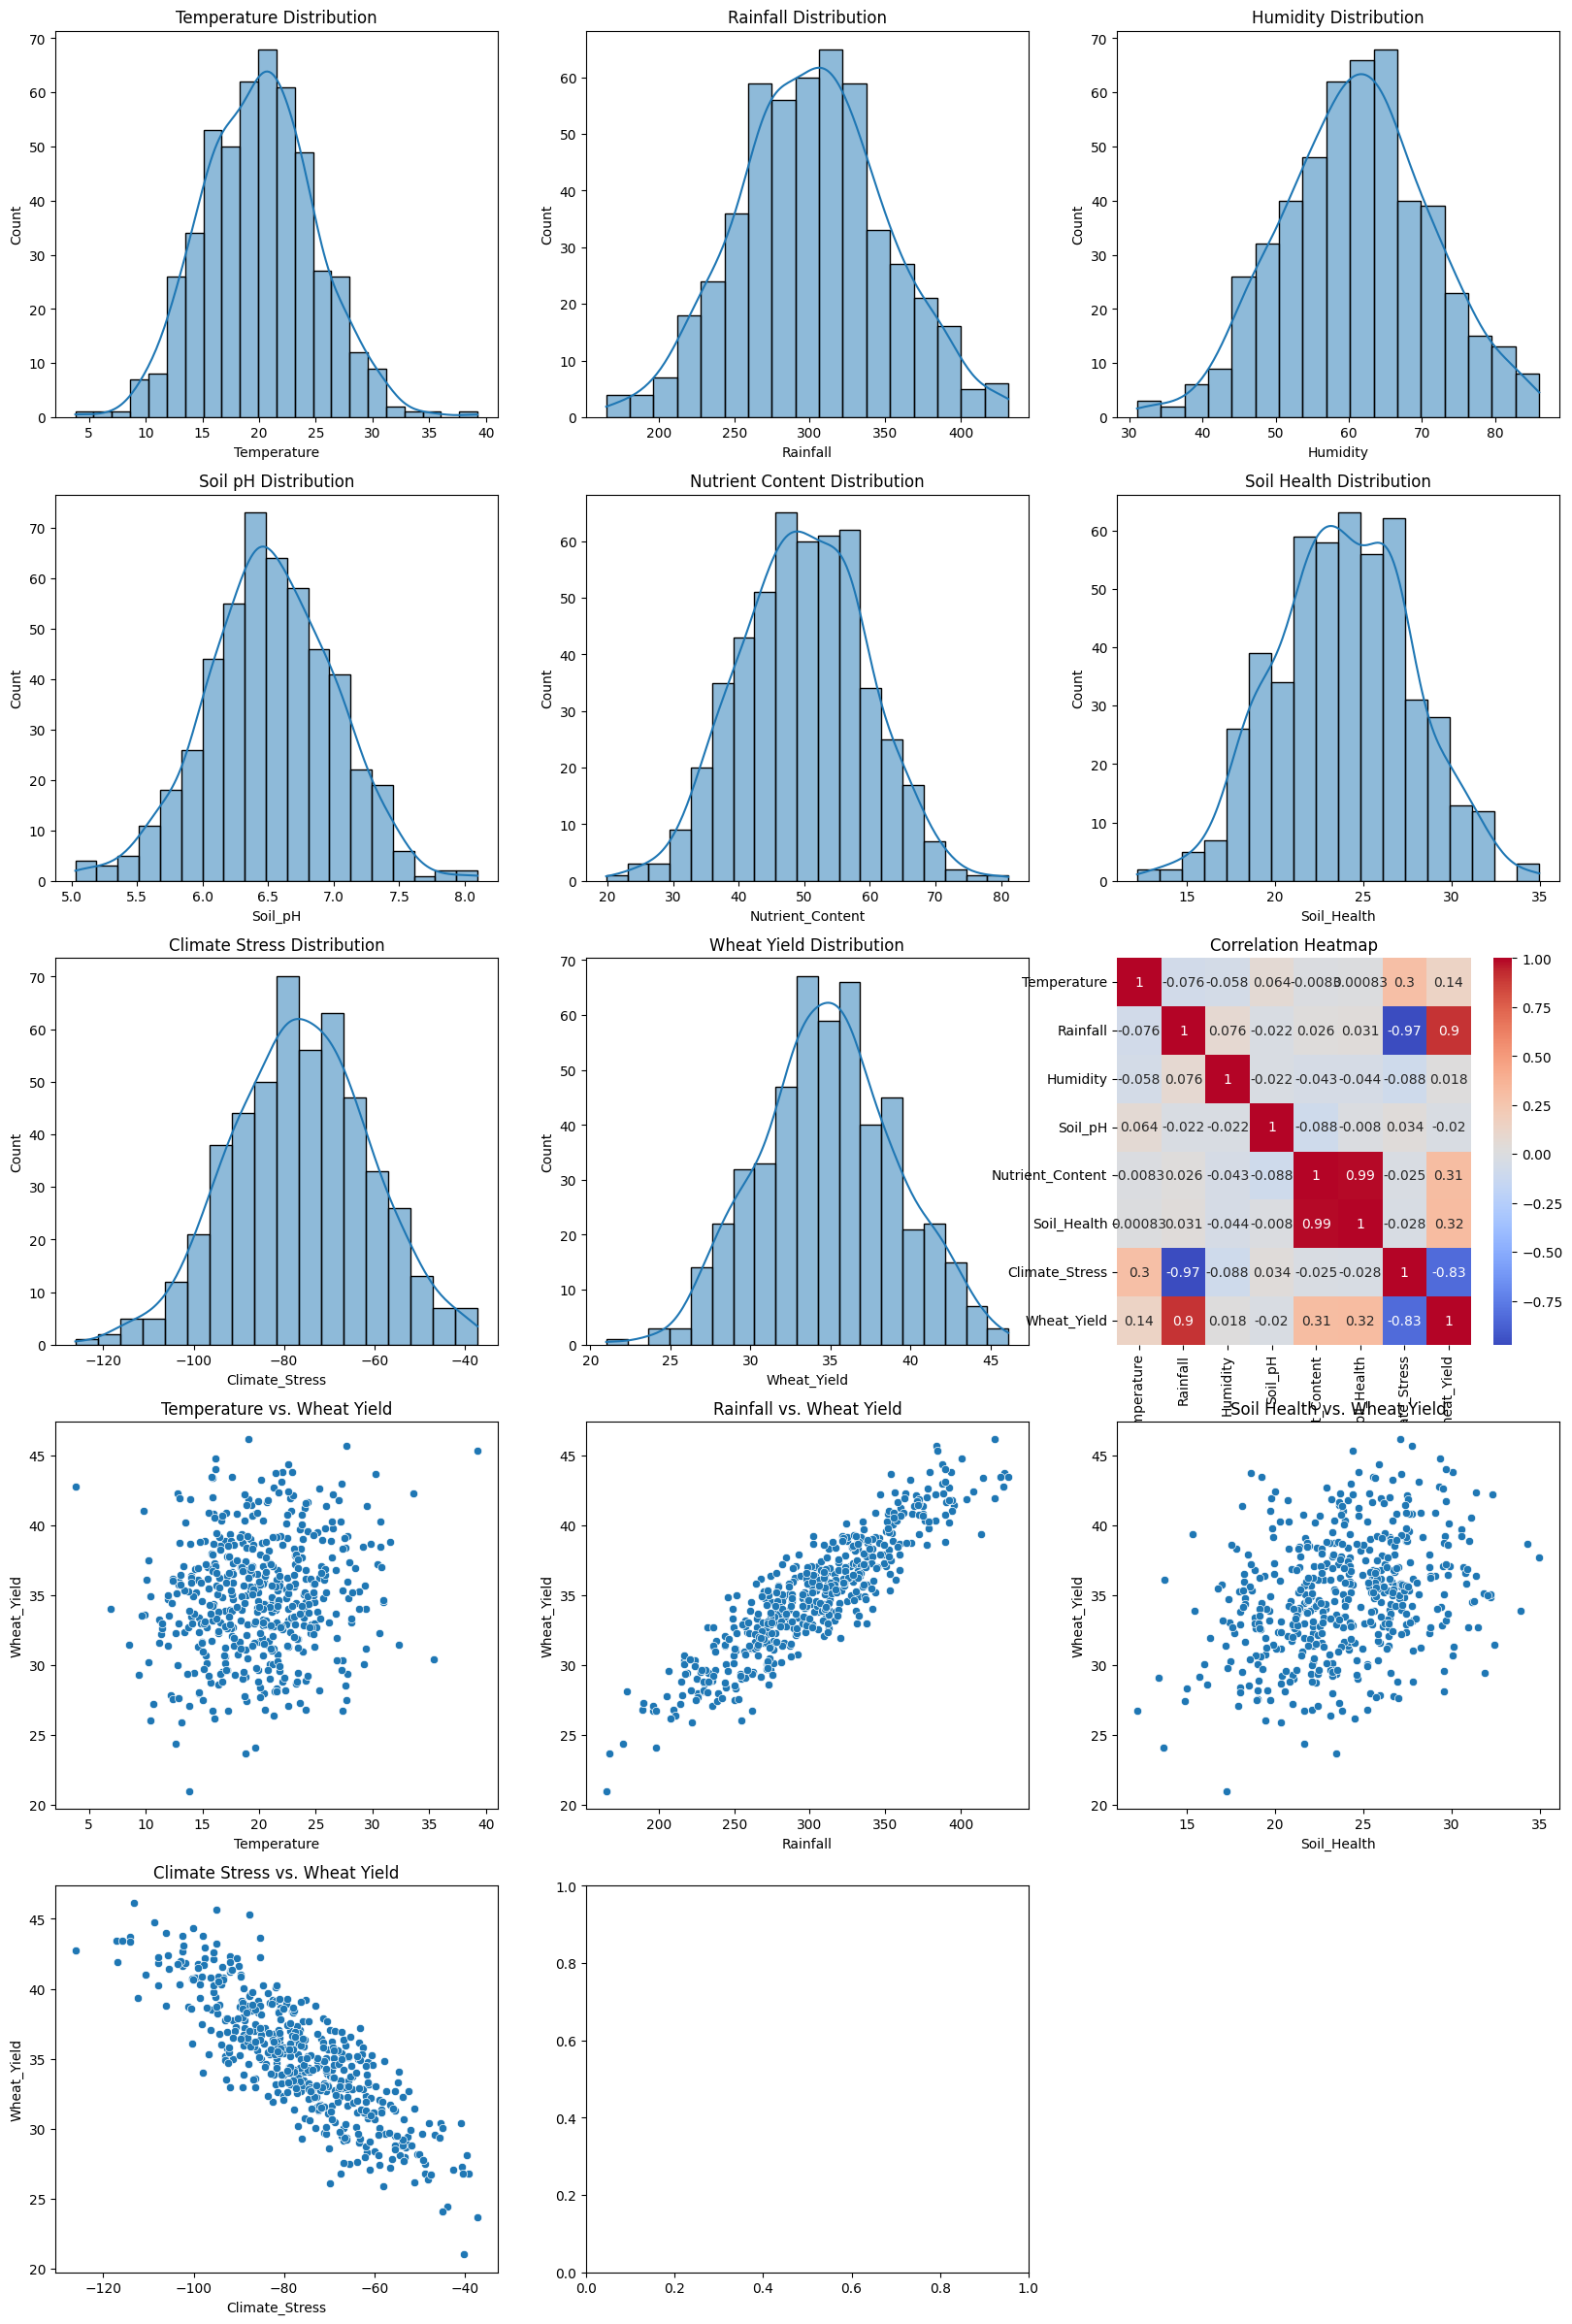

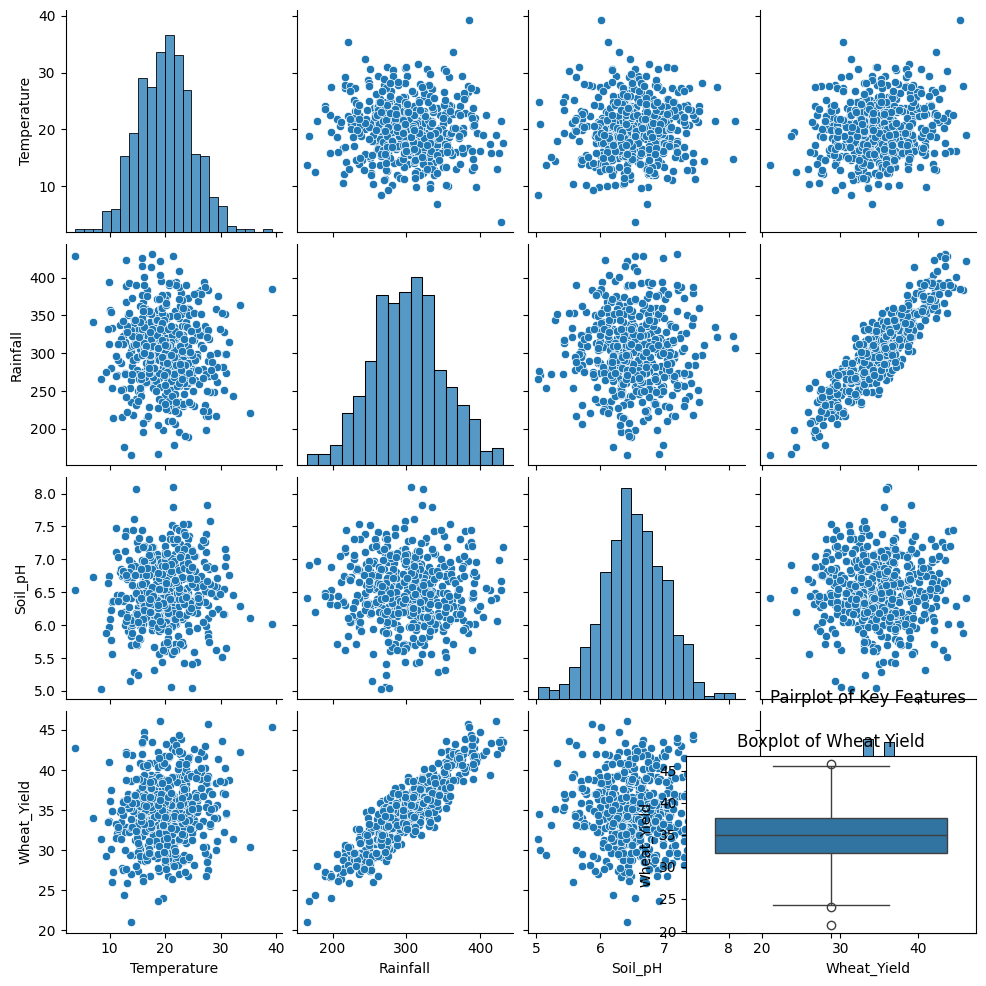

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate climate-related features
temperature = np.random.normal(20, 5, n_samples)  # Average temperature in Celsius
rainfall = np.random.normal(300, 50, n_samples)   # Rainfall in mm
humidity = np.random.normal(60, 10, n_samples)    # Humidity percentage

# Generate soil-related features
soil_ph = np.random.normal(6.5, 0.5, n_samples)    # Soil pH level
nutrient_content = np.random.normal(50, 10, n_samples)  # Nutrient content in ppm

# Latent variables
soil_health = 0.6 * soil_ph + 0.4 * nutrient_content + np.random.normal(0, 0.5, n_samples)
climate_stress = 0.7 * temperature - 0.3 * rainfall + np.random.normal(0, 0.5, n_samples)

# Crop yield influenced by multiple factors
crop_yield = (0.3 * soil_health + 0.4 * climate_stress +
              0.2 * rainfall - 0.1 * temperature +
              np.random.normal(0, 1, n_samples))

# Create DataFrame
df = pd.DataFrame({
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Humidity': humidity,
    'Soil_pH': soil_ph,
    'Nutrient_Content': nutrient_content,
    'Soil_Health': soil_health,
    'Climate_Stress': climate_stress,
    'Wheat_Yield': crop_yield
})

# Plotting visuals
plt.figure(figsize=(20, 30))

# 1. Temperature distribution
plt.subplot(5, 3, 1)
sns.histplot(df['Temperature'], kde=True)
plt.title('Temperature Distribution')

# 2. Rainfall distribution
plt.subplot(5, 3, 2)
sns.histplot(df['Rainfall'], kde=True)
plt.title('Rainfall Distribution')

# 3. Humidity distribution
plt.subplot(5, 3, 3)
sns.histplot(df['Humidity'], kde=True)
plt.title('Humidity Distribution')

# 4. Soil pH distribution
plt.subplot(5, 3, 4)
sns.histplot(df['Soil_pH'], kde=True)
plt.title('Soil pH Distribution')

# 5. Nutrient Content distribution
plt.subplot(5, 3, 5)
sns.histplot(df['Nutrient_Content'], kde=True)
plt.title('Nutrient Content Distribution')

# 6. Soil Health distribution
plt.subplot(5, 3, 6)
sns.histplot(df['Soil_Health'], kde=True)
plt.title('Soil Health Distribution')

# 7. Climate Stress distribution
plt.subplot(5, 3, 7)
sns.histplot(df['Climate_Stress'], kde=True)
plt.title('Climate Stress Distribution')

# 8. Wheat Yield distribution
plt.subplot(5, 3, 8)
sns.histplot(df['Wheat_Yield'], kde=True)
plt.title('Wheat Yield Distribution')

# 9. Correlation heatmap
plt.subplot(5, 3, 9)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 10. Temperature vs. Yield
plt.subplot(5, 3, 10)
sns.scatterplot(x='Temperature', y='Wheat_Yield', data=df)
plt.title('Temperature vs. Wheat Yield')

# 11. Rainfall vs. Yield
plt.subplot(5, 3, 11)
sns.scatterplot(x='Rainfall', y='Wheat_Yield', data=df)
plt.title('Rainfall vs. Wheat Yield')

# 12. Soil Health vs. Yield
plt.subplot(5, 3, 12)
sns.scatterplot(x='Soil_Health', y='Wheat_Yield', data=df)
plt.title('Soil Health vs. Wheat Yield')

# 13. Climate Stress vs. Yield
plt.subplot(5, 3, 13)
sns.scatterplot(x='Climate_Stress', y='Wheat_Yield', data=df)
plt.title('Climate Stress vs. Wheat Yield')

# 14. Pairplot
plt.subplot(5, 3, 14)
sns.pairplot(df[['Temperature', 'Rainfall', 'Soil_pH', 'Wheat_Yield']])
plt.title('Pairplot of Key Features')

# 15. Boxplot for Yield
plt.subplot(5, 3, 15)
sns.boxplot(y='Wheat_Yield', data=df)
plt.title('Boxplot of Wheat Yield')

plt.tight_layout()
plt.show()


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)

# Read the CSV file into a DataFrame
df = pd.read_csv('G:/venv/synthetic_crop_yield_data.csv')

# Clean the data
def clean_data(df):
    """
    Cleans the dataset by handling missing values and ensuring numeric data types.
    """
    # Ensure all columns expected to be numeric are actually numeric
    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']

    # Convert columns to numeric, forcing errors to NaN (if there are any non-numeric values)
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Remove rows with NaN values (optional: you can also impute them instead)
    df = df.dropna(subset=numeric_columns)
    
    return df

# Apply cleaning to the DataFrame
df = clean_data(df)

def define_and_fit_model(df):
    """
    Defines and fits a Structural Equation Model (SEM) on the provided dataset.

    Parameters:
    df (pd.DataFrame): The dataset to be used for model fitting.

    Returns:
    Model: The fitted SEM model.
    """
    model_desc = """
    # Measurement model
    Health =~ Soil_Quality + Temperature + Rainfall
    Result   =~ Output

    # Structural model
    Result ~ Health + Weather_Condition + Irrigation + Fertilizer
    """
    model = Model(model_desc)
    model.fit(df)
    return model


def plot_detailed_analysis(df):
    """
    Creates a detailed set of plots for deep analysis of the dataset.

    Parameters:
    df (pd.DataFrame): The dataset to be analyzed and visualized.
    """
    fig, axs = plt.subplots(5, 3, figsize=(18, 18))  # 5x3 grid of subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Correlation Heatmap
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axs[0, 0])
    axs[0, 0].set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

    # Distribution of Soil Quality
    sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple', ax=axs[0, 1])
    axs[0, 1].set_title("Distribution of Soil Quality", fontsize=14, fontweight='bold')

    # Temperature vs Output (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato', ax=axs[0, 2])
    axs[0, 2].set_title("Temperature vs Output", fontsize=14, fontweight='bold')

    # Output by Fertilizer (Boxplot)
    sns.boxplot(x='Fertilizer', y='Output', data=df, palette='coolwarm', ax=axs[1, 0])
    axs[1, 0].set_title("Output by Fertilizer", fontsize=14, fontweight='bold')

    # Output by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='Set2', ax=axs[1, 1])
    axs[1, 1].set_title("Output by Weather Condition", fontsize=14, fontweight='bold')

    # Output vs Soil Quality (Boxplot)
    sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Blues', ax=axs[1, 2])
    axs[1, 2].set_title("Output by Soil Quality", fontsize=14, fontweight='bold')

    # Pairplot to visualize relationships between multiple variables
    sns.pairplot(df[['Output', 'Soil_Quality', 'Temperature', 'Rainfall', 'Irrigation']], palette='coolwarm')
    plt.suptitle('Pairplot of Key Variables', fontsize=16, fontweight='bold')
    plt.show()

    # Output Distribution Histogram
    sns.histplot(df['Output'], bins=30, kde=True, color='darkblue', ax=axs[2, 0])
    axs[2, 0].set_title("Output Distribution", fontsize=14, fontweight='bold')

    # Rainfall vs Output (Scatter Plot)
    sns.scatterplot(x='Rainfall', y='Output', data=df, color='green', ax=axs[2, 1])
    axs[2, 1].set_title("Rainfall vs Output", fontsize=14, fontweight='bold')

    # Temperature vs Rainfall (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Rainfall', data=df, color='indianred', ax=axs[2, 2])
    axs[2, 2].set_title("Temperature vs Rainfall", fontsize=14, fontweight='bold')

    # Irrigation vs Output (Scatter Plot)
    sns.scatterplot(x='Irrigation', y='Output', data=df, color='orange', ax=axs[3, 0])
    axs[3, 0].set_title("Irrigation vs Output", fontsize=14, fontweight='bold')

    # Rainfall Distribution Histogram
    sns.histplot(df['Rainfall'], bins=20, kde=False, color='green', ax=axs[3, 1])
    axs[3, 1].set_title("Rainfall Distribution", fontsize=14, fontweight='bold')

    # Temperature by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Temperature', data=df, palette='Blues', ax=axs[3, 2])
    axs[3, 2].set_title("Temperature by Weather Condition", fontsize=14, fontweight='bold')

    # Pairwise Correlation Heatmap
    sns.heatmap(df[['Soil_Quality', 'Temperature', 'Rainfall', 'Output']].corr(), annot=True, cmap='coolwarm', ax=axs[4, 0])
    axs[4, 0].set_title("Pairwise Correlation of Selected Variables", fontsize=14, fontweight='bold')

    # Fertilizer vs Irrigation (Scatter Plot)
    sns.scatterplot(x='Fertilizer', y='Irrigation', data=df, color='purple', ax=axs[4, 1])
    axs[4, 1].set_title("Fertilizer vs Irrigation", fontsize=14, fontweight='bold')

    # Remove the unused subplot (4, 2)
    axs[4, 2].axis('off')

    # Show the plots
    plt.show()


def interpret_model_results(model):
    """
    Interpret the results of the fitted Structural Equation Model (SEM).

    Parameters:
    model (Model): The fitted SEM model to be interpreted.
    """
    results = model.inspect()
    params = results.get('parameters', None)
    
    if params is not None:
        interpretation = []
        for relationship in ['Health ~ Soil_Quality', 'Result ~ Health', 'Result ~ Weather_Condition',
                             'Result ~ Irrigation', 'Result ~ Fertilizer']:
            if relationship in params.index:
                param_estimate = params.loc[relationship, 'Estimate']
                effect = 'positively' if param_estimate > 0 else 'negatively'
                interpretation.append(f'{relationship} shows a {effect} significant influence (Estimate: {param_estimate:.2f}).')

        for statement in interpretation:
            print(statement)
    else:
        print("No parameters found. Check model fitting.")


def main():
    """
    Main function to execute the workflow: read data, fit the SEM model, visualize the data,
    and interpret the results.
    """
    # Apply data cleaning
    global df
    df = clean_data(df)

    # Define and fit SEM model
    model = define_and_fit_model(df)

    # Visualize the data insights (15 detailed plots)
    plot_detailed_analysis(df)

    # Interpret the model results
    interpret_model_results(model)


if __name__ == "__main__":
    main()


LinAlgError: Eigenvalues did not converge

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)


In [33]:
# Read the CSV file into a DataFrame
df = pd.read_csv('G:/venv/synthetic_crop_yield_data.csv')
df.shape

(100000, 7)

In [34]:
def clean_data(df):
    """
    Cleans the dataset by handling missing values and ensuring numeric data types.
    """
    # Ensure all columns expected to be numeric are actually numeric
    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']

    # Convert columns to numeric, forcing errors to NaN (if there are any non-numeric values)
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Impute missing values with the column mean (you can adjust this strategy as needed)
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    return df

# Apply cleaning to the DataFrame
df = clean_data(df)


In [35]:
# Check the size of the data after cleaning
print(f"Data shape after cleaning: {df.shape}")

# Proceed to standardization if data is not empty
if df.shape[0] > 0:
    df = standardize_data(df)
else:
    print("DataFrame is empty after cleaning. Please check your data source.")


Data shape after cleaning: (100000, 7)


In [36]:
def standardize_data(df):
    """
    Standardizes the numeric columns of the dataset if it contains rows.
    """
    # Ensure there is data to standardize
    if df.shape[0] == 0:
        raise ValueError("DataFrame is empty. Cannot standardize an empty dataset.")

    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']
    
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df

# Standardize the data after cleaning
df = standardize_data(df)
print(f"Data shape before standardization: {df.shape}")


Data shape before standardization: (100000, 7)


In [37]:
def standardize_data(df):
    """
    Standardizes the numeric columns of the dataset.
    """
    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']
    
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df

# Standardize the data after cleaning
df = standardize_data(df)
# Clean the data
df = clean_data(df)

# Check if data exists before proceeding with standardization
print(f"Data shape after cleaning: {df.shape}")

# If the data is not empty, proceed with standardization
if df.shape[0] > 0:
    df = standardize_data(df)
else:
    print("DataFrame is empty after cleaning. Please check your data source.")


Data shape after cleaning: (100000, 7)


In [38]:
def define_and_fit_model(df):
    """
    Defines and fits a Structural Equation Model (SEM) on the provided dataset.

    Parameters:
    df (pd.DataFrame): The dataset to be used for model fitting.

    Returns:
    Model: The fitted SEM model.
    """
    model_desc = """
    # Measurement model
    Health =~ Soil_Quality + Temperature + Rainfall
    Result   =~ Output

    # Structural model
    Result ~ Health + Weather_Condition + Irrigation + Fertilizer
    """
    model = Model(model_desc)
    model.fit(df)
    return model


In [39]:
def plot_detailed_analysis(df):
    """
    Creates a detailed set of plots for deep analysis of the dataset.

    Parameters:
    df (pd.DataFrame): The dataset to be analyzed and visualized.
    """
    fig, axs = plt.subplots(5, 3, figsize=(18, 18))  # 5x3 grid of subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Correlation Heatmap
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axs[0, 0])
    axs[0, 0].set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

    # Distribution of Soil Quality
    sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple', ax=axs[0, 1])
    axs[0, 1].set_title("Distribution of Soil Quality", fontsize=14, fontweight='bold')

    # Temperature vs Output (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato', ax=axs[0, 2])
    axs[0, 2].set_title("Temperature vs Output", fontsize=14, fontweight='bold')

    # Output by Fertilizer (Boxplot)
    sns.boxplot(x='Fertilizer', y='Output', data=df, palette='coolwarm', ax=axs[1, 0])
    axs[1, 0].set_title("Output by Fertilizer", fontsize=14, fontweight='bold')

    # Output by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='Set2', ax=axs[1, 1])
    axs[1, 1].set_title("Output by Weather Condition", fontsize=14, fontweight='bold')

    # Output vs Soil Quality (Boxplot)
    sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Blues', ax=axs[1, 2])
    axs[1, 2].set_title("Output by Soil Quality", fontsize=14, fontweight='bold')

    # Pairplot to visualize relationships between multiple variables
    sns.pairplot(df[['Output', 'Soil_Quality', 'Temperature', 'Rainfall', 'Irrigation']], palette='coolwarm')
    plt.suptitle('Pairplot of Key Variables', fontsize=16, fontweight='bold')
    plt.show()


In [40]:
def interpret_model_results(model):
    """
    Interpret the results of the fitted Structural Equation Model (SEM).

    Parameters:
    model (Model): The fitted SEM model to be interpreted.
    """
    results = model.inspect()
    params = results.get('parameters', None)
    
    if params is not None:
        interpretation = []
        for relationship in ['Health ~ Soil_Quality', 'Result ~ Health', 'Result ~ Weather_Condition',
                             'Result ~ Irrigation', 'Result ~ Fertilizer']:
            if relationship in params.index:
                param_estimate = params.loc[relationship, 'Estimate']
                effect = 'positively' if param_estimate > 0 else 'negatively'
                interpretation.append(f'{relationship} shows a {effect} significant influence (Estimate: {param_estimate:.2f}).')

        for statement in interpretation:
            print(statement)
    else:
        print("No parameters found. Check model fitting.")


In [42]:
def main():
    """
    Main function to execute the workflow: read data, clean, standardize, fit the SEM model,
    visualize the data, and interpret the results.
    """
    global df
    
    # Apply data cleaning and scaling
    df = clean_data(df)
    df = standardize_data(df)
    
    # Define and fit SEM model
    model = define_and_fit_model(df)
    
    # Visualize the data insights (15 detailed plots)
    plot_detailed_analysis(df)
    
    # Interpret the model results
    interpret_model_results(model)

if __name__ == "__main__":
    main()


LinAlgError: Eigenvalues did not converge

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)

# Load the CSV file into a DataFrame
df = pd.read_csv('G:/venv/synthetic_crop_yield_data.csv')

def clean_data(df):
    """
    Cleans the dataset by handling missing values and ensuring numeric data types.
    """
    # Ensure all columns expected to be numeric are actually numeric
    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']

    # Convert columns to numeric, forcing errors to NaN (if there are any non-numeric values)
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Impute missing values with the column mean (you can adjust this strategy as needed)
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    return df

def standardize_data(df):
    """
    Standardizes the numeric columns of the dataset.
    """
    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']
    
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df

def calculate_vif(df):
    """
    Calculate Variance Inflation Factor (VIF) to check multicollinearity.
    """
    df_with_const = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]
    return vif_data

def define_and_fit_model(df):
    """
    Defines and fits a Structural Equation Model (SEM) on the provided dataset.
    """
    # Simplified SEM model definition
    model_desc = """
    # Measurement model
    Health =~ Soil_Quality + Temperature
    
    # Structural model
    Result ~ Health + Weather_Condition
    """
    
    model = Model(model_desc)
    
    # Try fitting the model
    try:
        model.fit(df)
    except Exception as e:
        print(f"Error fitting model: {e}")
        return None
    
    return model

def plot_detailed_analysis(df):
    """
    Creates a detailed set of plots for deep analysis of the dataset.
    """
    fig, axs = plt.subplots(5, 3, figsize=(18, 18))  # 5x3 grid of subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Correlation Heatmap
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axs[0, 0])
    axs[0, 0].set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

    # Distribution of Soil Quality
    sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple', ax=axs[0, 1])
    axs[0, 1].set_title("Distribution of Soil Quality", fontsize=14, fontweight='bold')

    # Temperature vs Output (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato', ax=axs[0, 2])
    axs[0, 2].set_title("Temperature vs Output", fontsize=14, fontweight='bold')

    # Output by Fertilizer (Boxplot)
    sns.boxplot(x='Fertilizer', y='Output', data=df, palette='coolwarm', ax=axs[1, 0])
    axs[1, 0].set_title("Output by Fertilizer", fontsize=14, fontweight='bold')

    # Output by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='Set2', ax=axs[1, 1])
    axs[1, 1].set_title("Output by Weather Condition", fontsize=14, fontweight='bold')

    # Output vs Soil Quality (Boxplot)
    sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Blues', ax=axs[1, 2])
    axs[1, 2].set_title("Output by Soil Quality", fontsize=14, fontweight='bold')

    # Pairplot to visualize relationships between multiple variables
    sns.pairplot(df[['Output', 'Soil_Quality', 'Temperature', 'Rainfall', 'Irrigation']], palette='coolwarm')
    plt.suptitle('Pairplot of Key Variables', fontsize=16, fontweight='bold')
    plt.show()

def interpret_model_results(model):
    """
    Interpret the results of the fitted Structural Equation Model (SEM).
    """
    results = model.inspect()
    params = results.get('parameters', None)
    
    if params is not None:
        interpretation = []
        for relationship in ['Health ~ Soil_Quality', 'Result ~ Health', 'Result ~ Weather_Condition',
                             'Result ~ Irrigation', 'Result ~ Fertilizer']:
            if relationship in params.index:
                param_estimate = params.loc[relationship, 'Estimate']
                effect = 'positively' if param_estimate > 0 else 'negatively'
                interpretation.append(f'{relationship} shows a {effect} significant influence (Estimate: {param_estimate:.2f}).')

        for statement in interpretation:
            print(statement)
    else:
        print("No parameters found. Check model fitting.")

def main():
    """
    Main function to execute the workflow: read data, clean, standardize, fit the SEM model,
    visualize the data, and interpret the results.
    """
    global df
    
    # Load and clean data
    df = pd.read_csv('G:/venv/synthetic_crop_yield_data.csv')
    df = clean_data(df)
    print(f"Data shape after cleaning: {df.shape}")

    # Standardize data
    if df.shape[0] > 0:
        df = standardize_data(df)
    else:
        print("DataFrame is empty after cleaning. Please check your data source.")
    
    # Calculate VIF for multicollinearity
    vif_data = calculate_vif(df)
    print(vif_data)  # Check for any variables with VIF > 10
    
    # Define and fit SEM model
    model = define_and_fit_model(df)
    if model is not None:
        # Visualize the data insights (15 detailed plots)
        plot_detailed_analysis(df)
    
        # Interpret the model results
        interpret_model_results(model)
    else:
        print("Model fitting failed. Please check the input data and model definition.")

if __name__ == "__main__":
    main()


Data shape after cleaning: (100000, 7)


MissingDataError: exog contains inf or nans

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)

# Load the CSV file into a DataFrame
df = pd.read_csv('G:/venv/synthetic_crop_yield_data.csv')

def clean_data(df):
    """
    Cleans the dataset by handling missing values and ensuring numeric data types.
    """
    # Ensure all columns expected to be numeric are actually numeric
    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']

    # Convert columns to numeric, forcing errors to NaN (if there are any non-numeric values)
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Impute missing values with the column mean (you can adjust this strategy as needed)
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    return df

def standardize_data(df):
    """
    Standardizes the numeric columns of the dataset.
    """
    numeric_columns = ['Soil_Quality', 'Weather_Condition', 'Irrigation', 'Fertilizer', 
                       'Temperature', 'Rainfall', 'Output']
    
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df

def calculate_vif(df):
    """
    Calculate Variance Inflation Factor (VIF) to check multicollinearity.
    """
    df_with_const = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]
    return vif_data

def define_and_fit_model(df):
    """
    Defines and fits a Structural Equation Model (SEM) on the provided dataset.
    """
    # Simplified SEM model definition
    model_desc = """
    # Measurement model
    Health =~ Soil_Quality + Temperature
    
    # Structural model
    Result ~ Health + Weather_Condition
    """
    
    model = Model(model_desc)
    
    # Try fitting the model
    try:
        model.fit(df)
    except Exception as e:
        print(f"Error fitting model: {e}")
        return None
    
    return model

def plot_detailed_analysis(df):
    """
    Creates a detailed set of plots for deep analysis of the dataset.
    """
    fig, axs = plt.subplots(5, 3, figsize=(18, 18))  # 5x3 grid of subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Correlation Heatmap
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axs[0, 0])
    axs[0, 0].set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

    # Distribution of Soil Quality
    sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple', ax=axs[0, 1])
    axs[0, 1].set_title("Distribution of Soil Quality", fontsize=14, fontweight='bold')

    # Temperature vs Output (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato', ax=axs[0, 2])
    axs[0, 2].set_title("Temperature vs Output", fontsize=14, fontweight='bold')

    # Output by Fertilizer (Boxplot)
    sns.boxplot(x='Fertilizer', y='Output', data=df, palette='coolwarm', ax=axs[1, 0])
    axs[1, 0].set_title("Output by Fertilizer", fontsize=14, fontweight='bold')

    # Output by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='Set2', ax=axs[1, 1])
    axs[1, 1].set_title("Output by Weather Condition", fontsize=14, fontweight='bold')

    # Output vs Soil Quality (Boxplot)
    sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Blues', ax=axs[1, 2])
    axs[1, 2].set_title("Output by Soil Quality", fontsize=14, fontweight='bold')

    # Pairplot to visualize relationships between multiple variables
    sns.pairplot(df[['Output', 'Soil_Quality', 'Temperature', 'Rainfall', 'Irrigation']], palette='coolwarm')
    plt.suptitle('Pairplot of Key Variables', fontsize=16, fontweight='bold')
    plt.show()

def interpret_model_results(model):
    """
    Interpret the results of the fitted Structural Equation Model (SEM).
    """
    results = model.inspect()
    params = results.get('parameters', None)
    
    if params is not None:
        interpretation = []
        for relationship in ['Health ~ Soil_Quality', 'Result ~ Health', 'Result ~ Weather_Condition',
                             'Result ~ Irrigation', 'Result ~ Fertilizer']:
            if relationship in params.index:
                param_estimate = params.loc[relationship, 'Estimate']
                effect = 'positively' if param_estimate > 0 else 'negatively'
                interpretation.append(f'{relationship} shows a {effect} significant influence (Estimate: {param_estimate:.2f}).')

        for statement in interpretation:
            print(statement)
    else:
        print("No parameters found. Check model fitting.")

def main():
    """
    Main function to execute the workflow: read data, clean, standardize, fit the SEM model,
    visualize the data, and interpret the results.
    """
    global df
    
    # Load and clean data
    df = pd.read_csv('G:/venv/synthetic_crop_yield_data.csv')
    df = clean_data(df)
    print(f"Data shape after cleaning: {df.shape}")

    # Standardize data
    if df.shape[0] > 0:
        df = standardize_data(df)
    else:
        print("DataFrame is empty after cleaning. Please check your data source.")
    
    # Calculate VIF for multicollinearity
    vif_data = calculate_vif(df)
    print(vif_data)  # Check for any variables with VIF > 10
    
    # Define and fit SEM model
    model = define_and_fit_model(df)
    if model is not None:
        # Visualize the data insights (15 detailed plots)
        plot_detailed_analysis(df)
    
        # Interpret the model results
        interpret_model_results(model)
    else:
        print("Model fitting failed. Please check the input data and model definition.")

if __name__ == "__main__":
    main()


Data shape after cleaning: (100000, 7)


MissingDataError: exog contains inf or nans

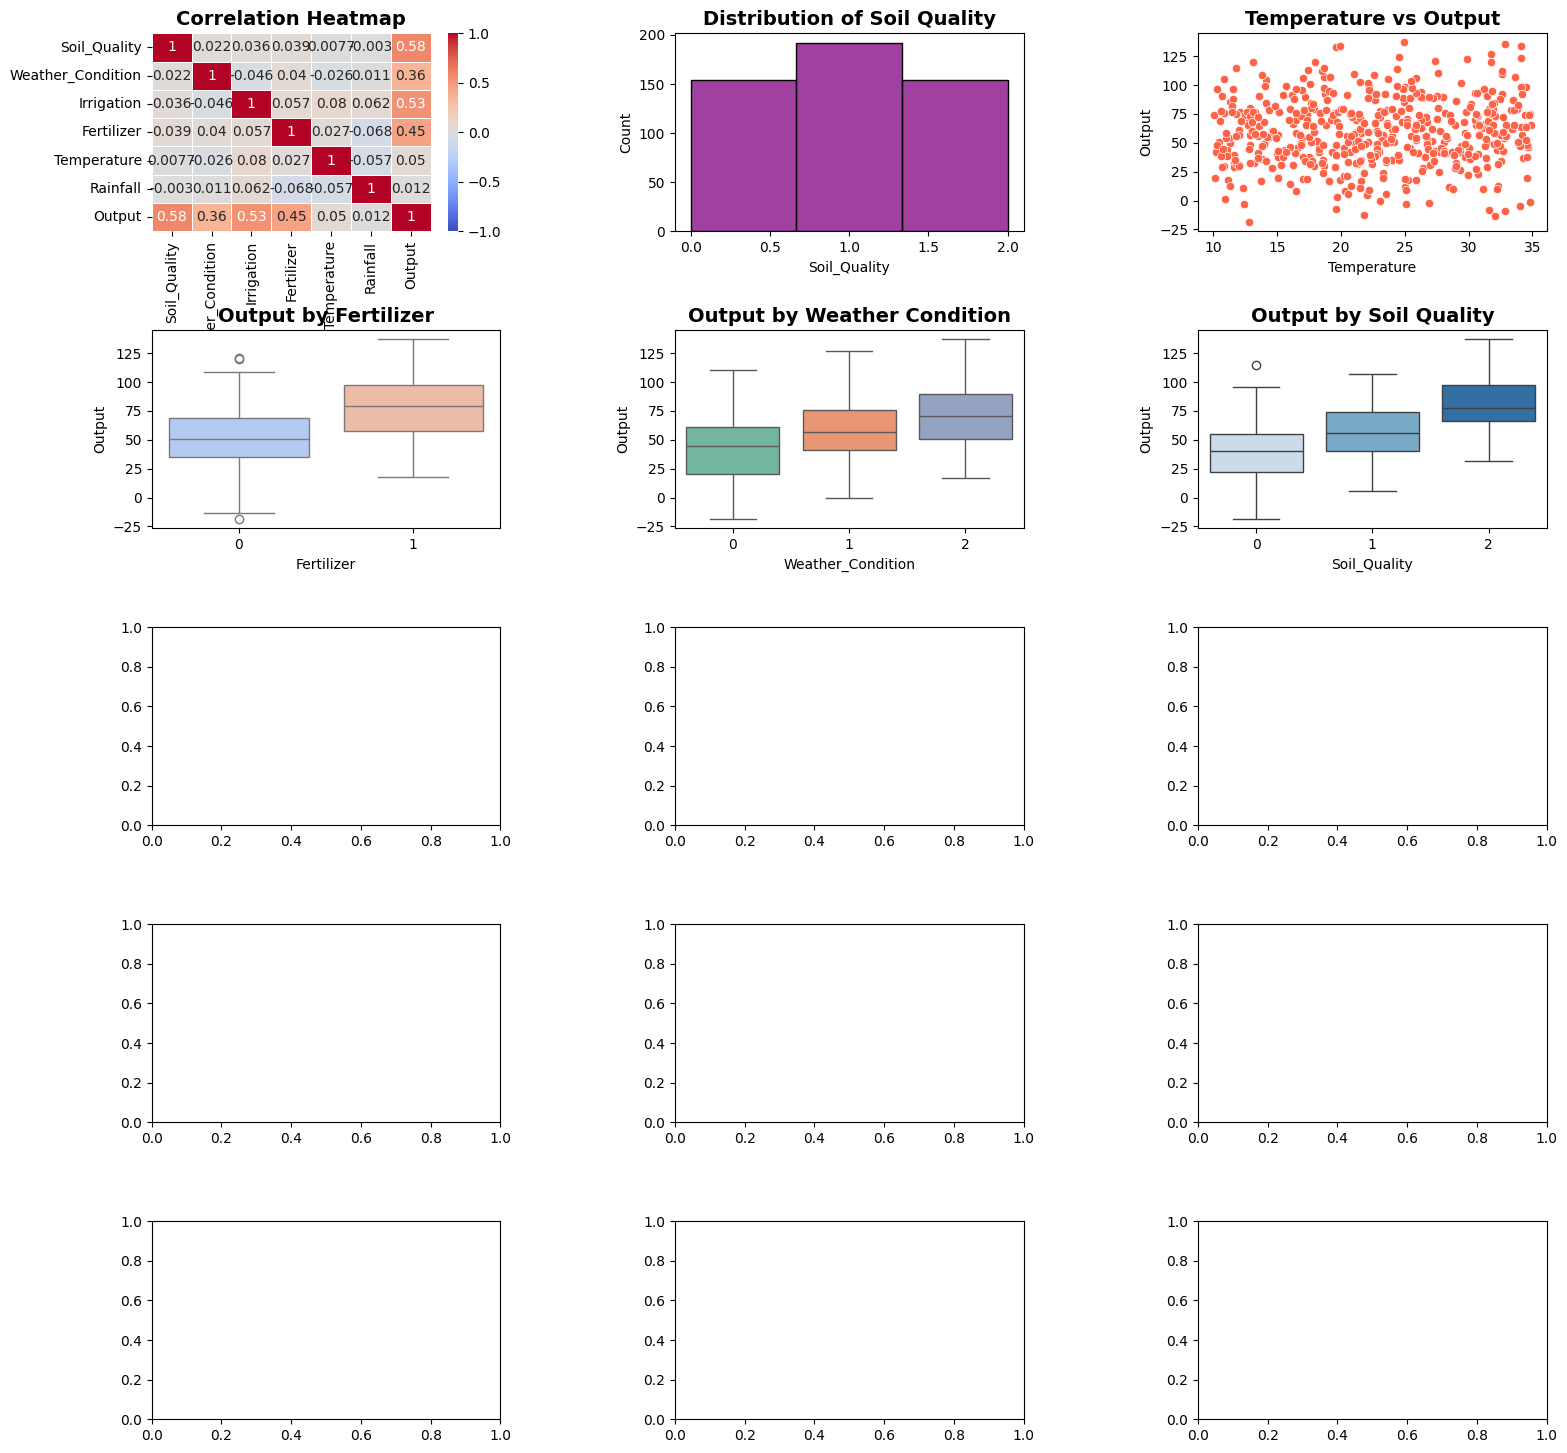

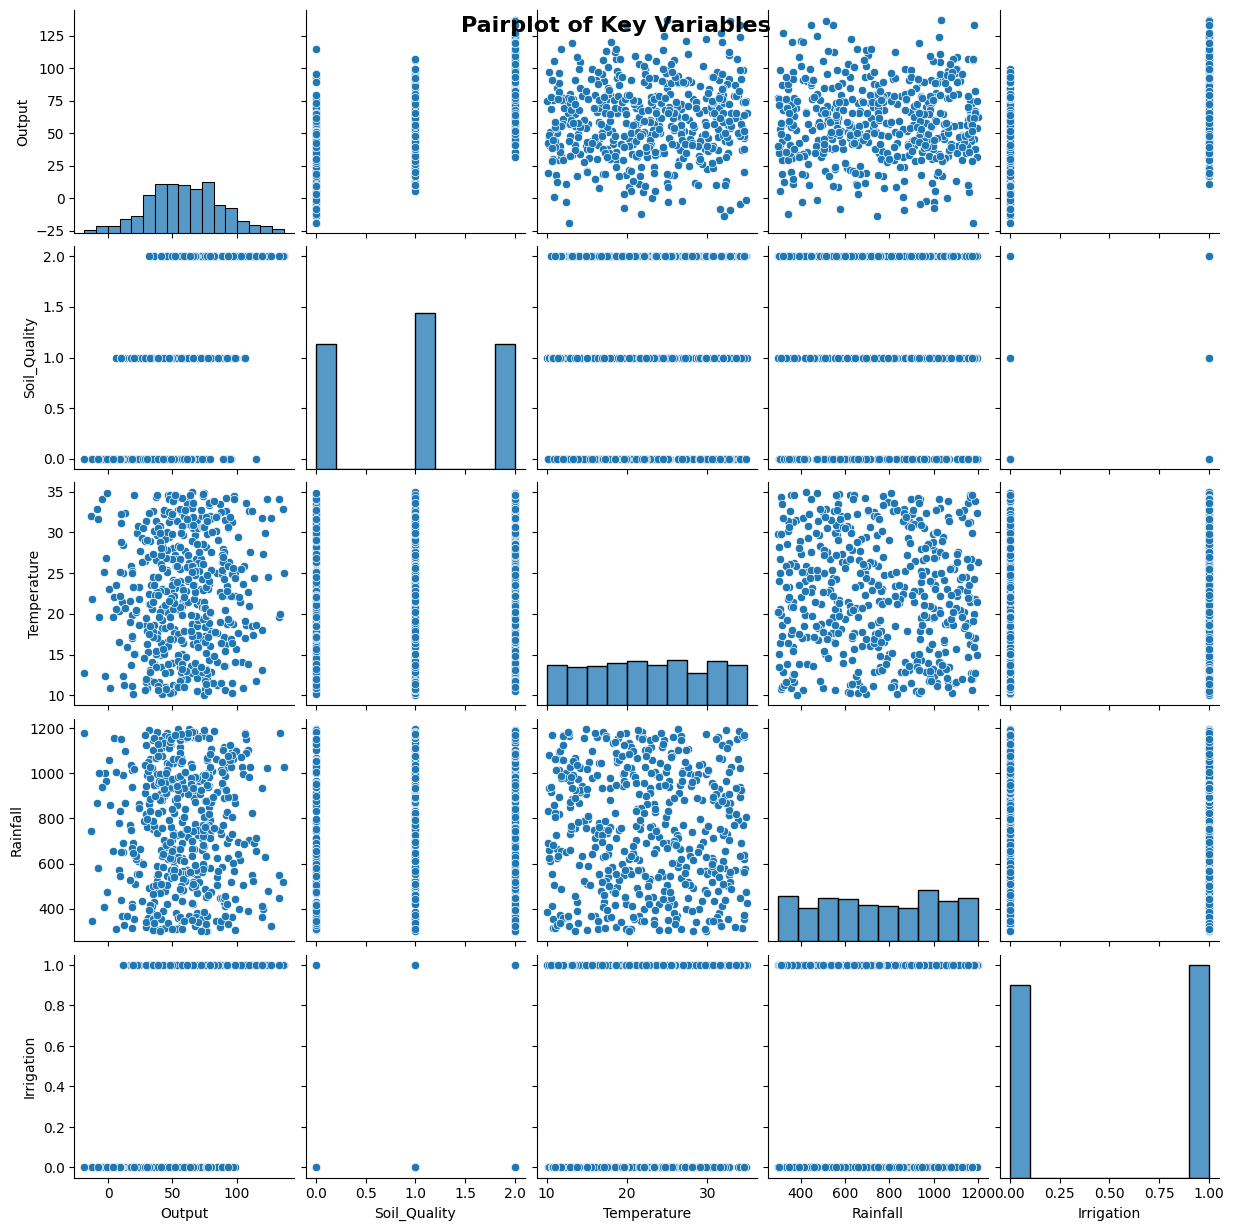

No parameters found. Check model fitting.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)

df = df.read_csv('G:\venv\synthetic_crop_yield_data.csv)
def generate_synthetic_data(n_samples=500):
    """
    Generates synthetic crop yield data based on various environmental factors.

    Parameters:
    n_samples (int): The number of samples to generate for the dataset.

    Returns:
    pd.DataFrame: A DataFrame containing the generated data.
    """
    soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])
    weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])
    irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
    fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
    temperature = np.random.uniform(10, 35, size=n_samples)
    rainfall = np.random.uniform(300, 1200, size=n_samples)

    output = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

    df = pd.DataFrame({
        'Soil_Quality': soil_quality,
        'Weather_Condition': weather_condition,
        'Irrigation': irrigation,
        'Fertilizer': fertilizer,
        'Temperature': temperature,
        'Rainfall': rainfall,
        'Output': output
    })
    return df


def define_and_fit_model(df):
    """
    Defines and fits a Structural Equation Model (SEM) on the provided dataset.

    Parameters:
    df (pd.DataFrame): The dataset to be used for model fitting.

    Returns:
    Model: The fitted SEM model.
    """
    model_desc = """
    # Measurement model
    Health =~ Soil_Quality + Temperature + Rainfall
    Result   =~ Output

    # Structural model
    Result ~ Health + Weather_Condition + Irrigation + Fertilizer
    """
    model = Model(model_desc)
    model.fit(df)
    return model


def plot_detailed_analysis(df):
    """
    Creates a detailed set of plots for deep analysis of the dataset.

    Parameters:
    df (pd.DataFrame): The dataset to be analyzed and visualized.
    """
    fig, axs = plt.subplots(5, 3, figsize=(18, 18))  # 5x3 grid of subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Correlation Heatmap
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axs[0, 0])
    axs[0, 0].set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

    # Distribution of Soil Quality
    sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple', ax=axs[0, 1])
    axs[0, 1].set_title("Distribution of Soil Quality", fontsize=14, fontweight='bold')

    # Temperature vs Output (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato', ax=axs[0, 2])
    axs[0, 2].set_title("Temperature vs Output", fontsize=14, fontweight='bold')

    # Output by Fertilizer (Boxplot)
    sns.boxplot(x='Fertilizer', y='Output', data=df, palette='coolwarm', ax=axs[1, 0])
    axs[1, 0].set_title("Output by Fertilizer", fontsize=14, fontweight='bold')

    # Output by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='Set2', ax=axs[1, 1])
    axs[1, 1].set_title("Output by Weather Condition", fontsize=14, fontweight='bold')

    # Output vs Soil Quality (Boxplot)
    sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Blues', ax=axs[1, 2])
    axs[1, 2].set_title("Output by Soil Quality", fontsize=14, fontweight='bold')

    # Pairplot to visualize relationships between multiple variables
    sns.pairplot(df[['Output', 'Soil_Quality', 'Temperature', 'Rainfall', 'Irrigation']], palette='coolwarm')
    plt.suptitle('Pairplot of Key Variables', fontsize=16, fontweight='bold')
    plt.show()

    # Output Distribution Histogram
    sns.histplot(df['Output'], bins=30, kde=True, color='darkblue', ax=axs[2, 0])
    axs[2, 0].set_title("Output Distribution", fontsize=14, fontweight='bold')

    # Rainfall vs Output (Scatter Plot)
    sns.scatterplot(x='Rainfall', y='Output', data=df, color='green', ax=axs[2, 1])
    axs[2, 1].set_title("Rainfall vs Output", fontsize=14, fontweight='bold')

    # Temperature vs Rainfall (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Rainfall', data=df, color='indianred', ax=axs[2, 2])
    axs[2, 2].set_title("Temperature vs Rainfall", fontsize=14, fontweight='bold')

    # Irrigation vs Output (Scatter Plot)
    sns.scatterplot(x='Irrigation', y='Output', data=df, color='orange', ax=axs[3, 0])
    axs[3, 0].set_title("Irrigation vs Output", fontsize=14, fontweight='bold')

    # Rainfall Distribution Histogram
    sns.histplot(df['Rainfall'], bins=20, kde=False, color='green', ax=axs[3, 1])
    axs[3, 1].set_title("Rainfall Distribution", fontsize=14, fontweight='bold')

    # Temperature by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Temperature', data=df, palette='Blues', ax=axs[3, 2])
    axs[3, 2].set_title("Temperature by Weather Condition", fontsize=14, fontweight='bold')

    # Pairwise Correlation Heatmap
    sns.heatmap(df[['Soil_Quality', 'Temperature', 'Rainfall', 'Output']].corr(), annot=True, cmap='coolwarm', ax=axs[4, 0])
    axs[4, 0].set_title("Pairwise Correlation of Selected Variables", fontsize=14, fontweight='bold')

    # Fertilizer vs Irrigation (Scatter Plot)
    sns.scatterplot(x='Fertilizer', y='Irrigation', data=df, color='purple', ax=axs[4, 1])
    axs[4, 1].set_title("Fertilizer vs Irrigation", fontsize=14, fontweight='bold')

    # Remove the unused subplot (4, 2)
    axs[4, 2].axis('off')

    # Show the plots
    plt.show()


def interpret_model_results(model):
    """
    Interpret the results of the fitted Structural Equation Model (SEM).

    Parameters:
    model (Model): The fitted SEM model to be interpreted.
    """
    results = model.inspect()
    params = results.get('parameters', None)
    
    if params is not None:
        interpretation = []
        for relationship in ['Health ~ Soil_Quality', 'Result ~ Health', 'Result ~ Weather_Condition',
                             'Result ~ Irrigation', 'Result ~ Fertilizer']:
            if relationship in params.index:
                param_estimate = params.loc[relationship, 'Estimate']
                effect = 'positively' if param_estimate > 0 else 'negatively'
                interpretation.append(f'{relationship} shows a {effect} significant influence (Estimate: {param_estimate:.2f}).')

        for statement in interpretation:
            print(statement)
    else:
        print("No parameters found. Check model fitting.")


def main():
    """
    Main function to execute the workflow: generate data, fit the SEM model, visualize the data,
    and interpret the results.
    """
    # Generate synthetic data
    df = generate_synthetic_data(n_samples=500)

    # Define and fit SEM model
    model = define_and_fit_model(df)

    # Visualize the data insights (15 detailed plots)
    plot_detailed_analysis(df)

    # Interpret the model results
    interpret_model_results(model)


if __name__ == "__main__":
    main()


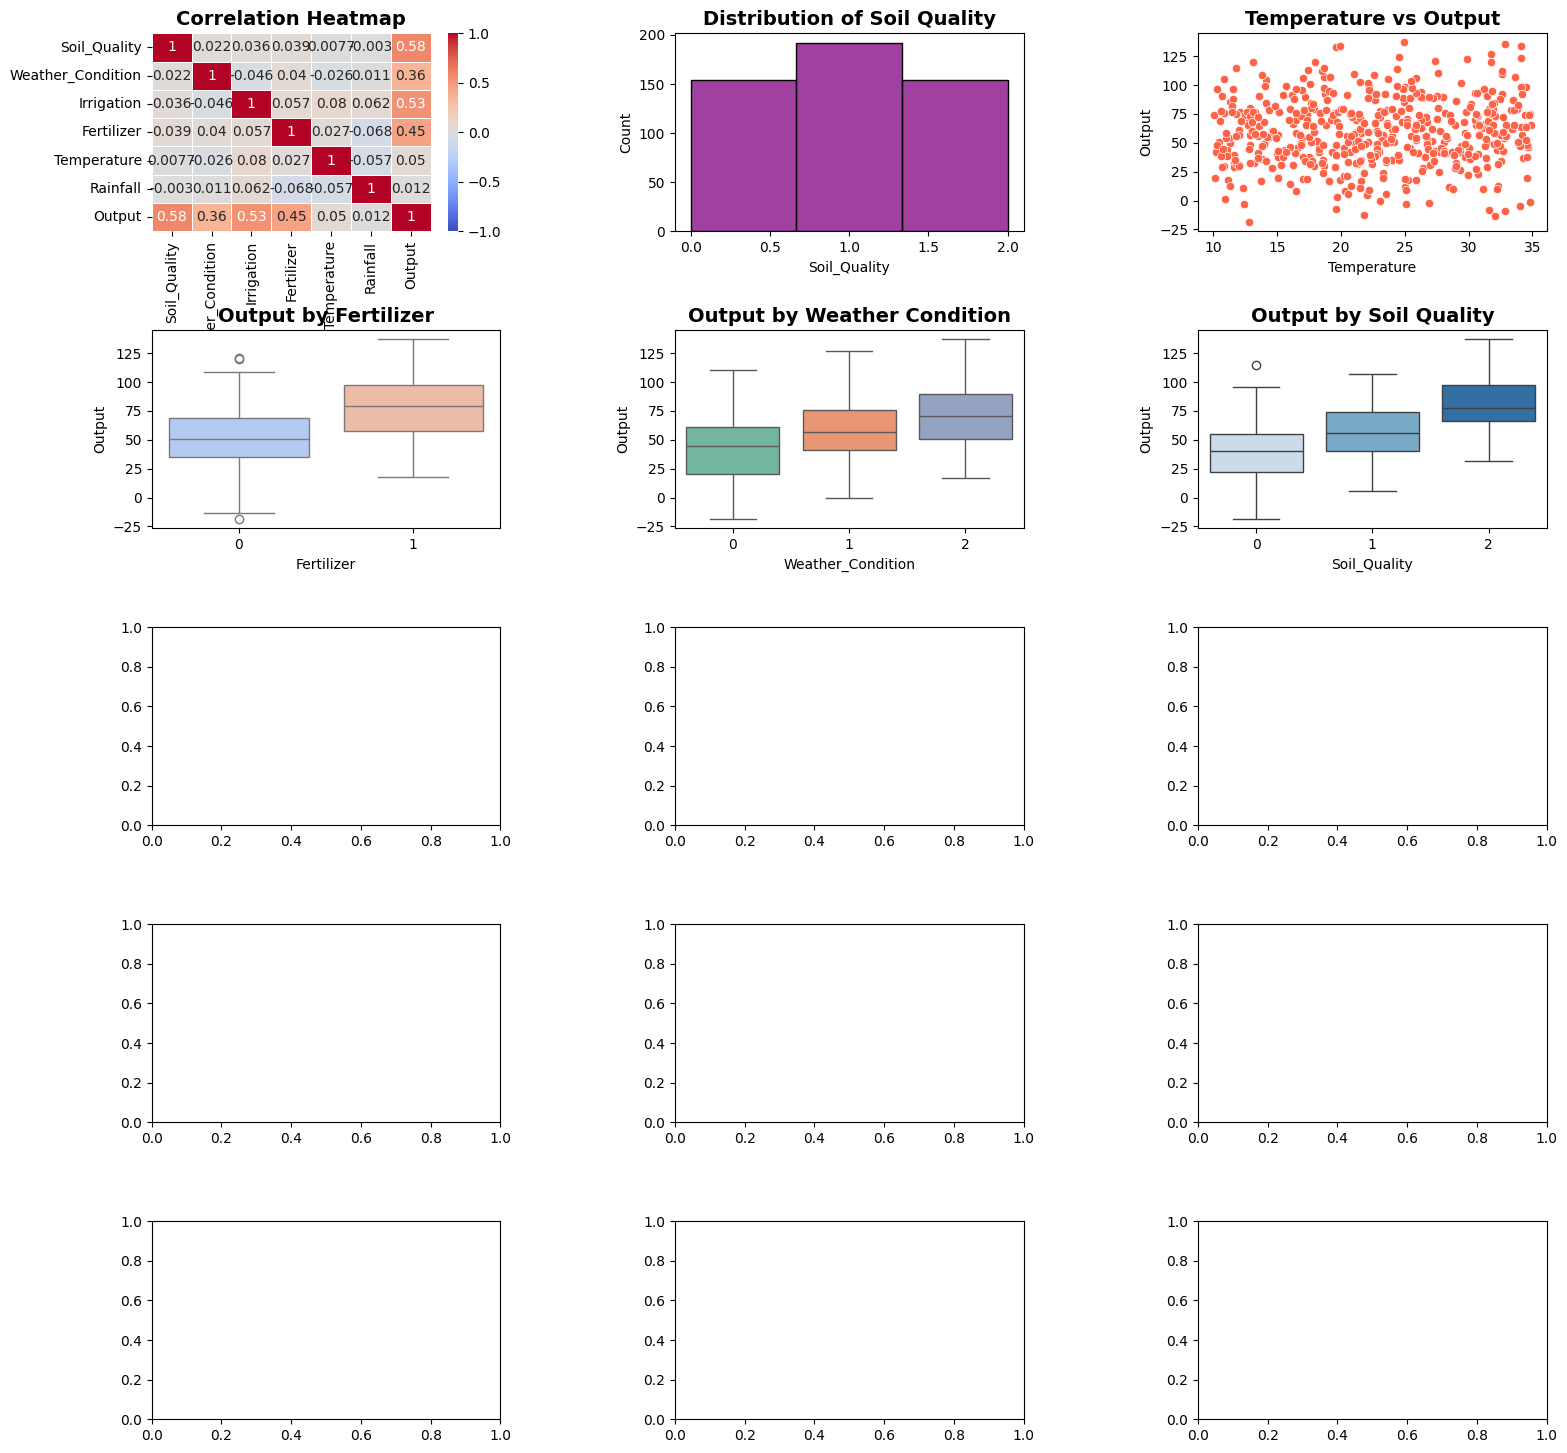

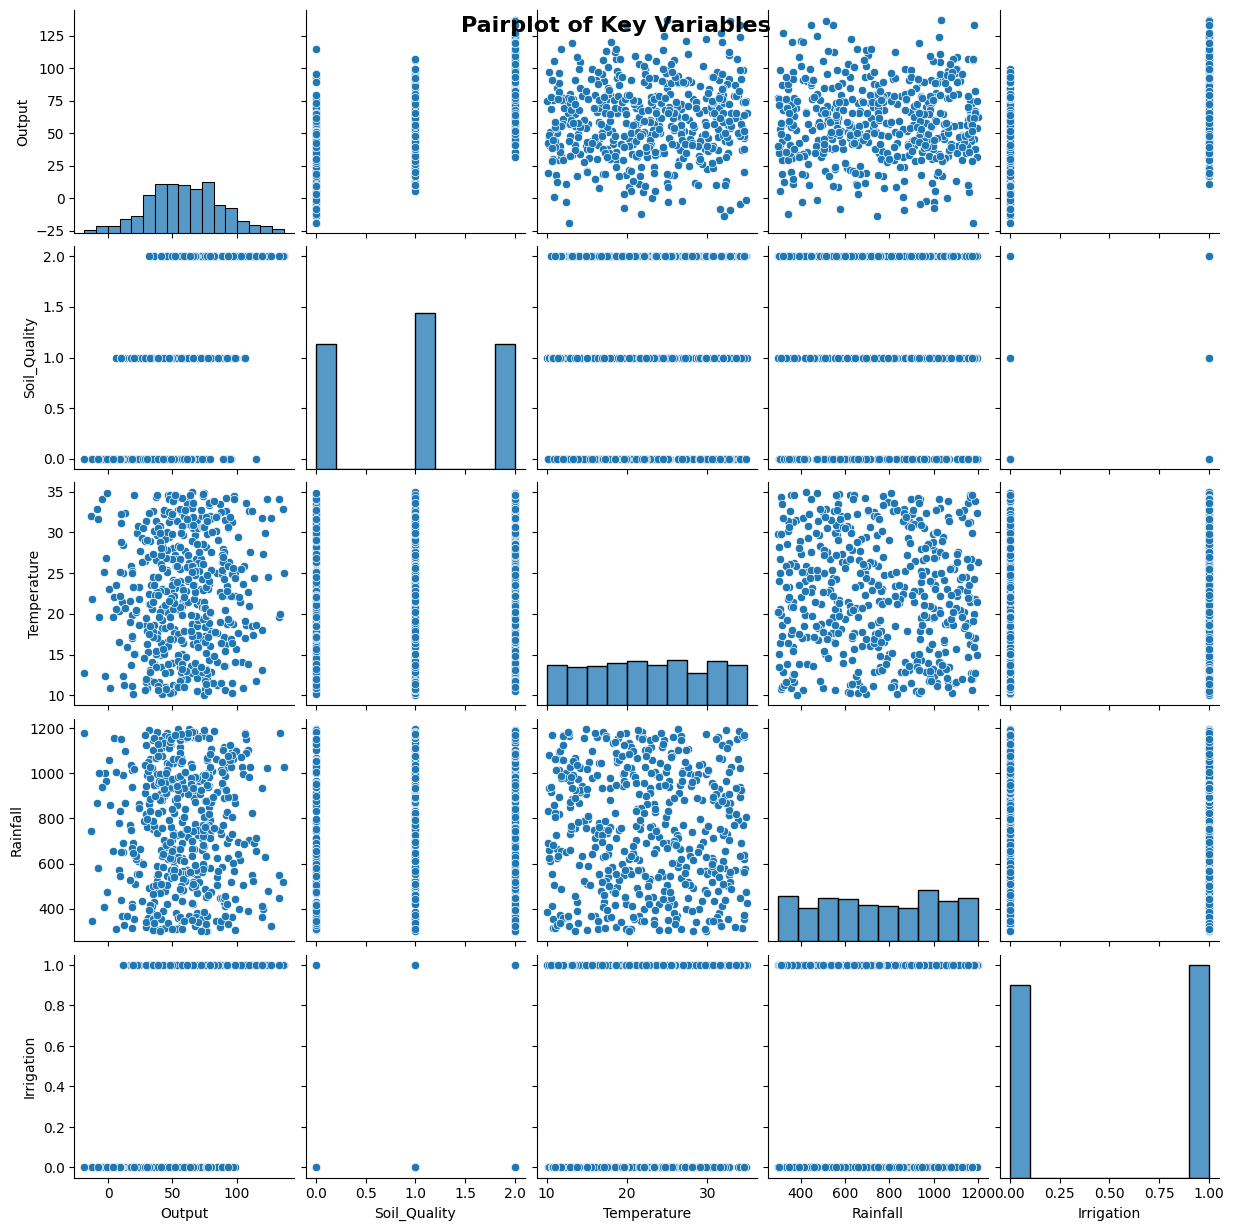

No parameters found. Check model fitting.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)

# Function to simulate synthetic data
def generate_synthetic_data(n_samples=500):
    """Generate synthetic dataset simulating crop yield data based on various factors."""
    soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])
    weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])
    irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
    fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
    temperature = np.random.uniform(10, 35, size=n_samples)
    rainfall = np.random.uniform(300, 1200, size=n_samples)

    output = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

    df = pd.DataFrame({
        'Soil_Quality': soil_quality,
        'Weather_Condition': weather_condition,
        'Irrigation': irrigation,
        'Fertilizer': fertilizer,
        'Temperature': temperature,
        'Rainfall': rainfall,
        'Output': output
    })
    return df

# Function to define and fit the Structural Equation Model (SEM)
def define_and_fit_model(df):
    """Define and fit a Structural Equation Model (SEM) on the provided dataset."""
    model_desc = """
    # Measurement model
    Health =~ Soil_Quality + Temperature + Rainfall
    Result   =~ Output

    # Structural model
    Result ~ Health + Weather_Condition + Irrigation + Fertilizer
    """
    model = Model(model_desc)
    model.fit(df)
    return model

# Function for detailed plotting and analysis
def plot_detailed_analysis(df):
    """Create a detailed set of 15 plots for deep analysis of the dataset."""
    fig, axs = plt.subplots(5, 3, figsize=(18, 18))  # 5x3 grid of subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # 1. Correlation Heatmap
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axs[0, 0])
    axs[0, 0].set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

    # 2. Distribution of Soil Quality
    sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple', ax=axs[0, 1])
    axs[0, 1].set_title("Distribution of Soil Quality", fontsize=14, fontweight='bold')

    # 3. Temperature vs Output (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato', ax=axs[0, 2])
    axs[0, 2].set_title("Temperature vs Output", fontsize=14, fontweight='bold')

    # 4. Boxplot for Output by Fertilizer
    sns.boxplot(x='Fertilizer', y='Output', data=df, palette='coolwarm', ax=axs[1, 0])
    axs[1, 0].set_title("Output by Fertilizer", fontsize=14, fontweight='bold')

    # 5. Output by Weather Condition (Boxplot)
    sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='Set2', ax=axs[1, 1])
    axs[1, 1].set_title("Output by Weather Condition", fontsize=14, fontweight='bold')

    # 6. Output vs Soil Quality (Boxplot)
    sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Blues', ax=axs[1, 2])
    axs[1, 2].set_title("Output by Soil Quality", fontsize=14, fontweight='bold')

    # 7. Pairplot to visualize relationships between multiple variables
    sns.pairplot(df[['Output', 'Soil_Quality', 'Temperature', 'Rainfall', 'Irrigation']], palette='coolwarm')
    plt.suptitle('Pairplot of Key Variables', fontsize=16, fontweight='bold')
    plt.show()

    # 8. Histogram for Output distribution
    sns.histplot(df['Output'], bins=30, kde=True, color='darkblue', ax=axs[2, 0])
    axs[2, 0].set_title("Output Distribution", fontsize=14, fontweight='bold')

    # 9. Rainfall vs Output (Scatter Plot)
    sns.scatterplot(x='Rainfall', y='Output', data=df, color='green', ax=axs[2, 1])
    axs[2, 1].set_title("Rainfall vs Output", fontsize=14, fontweight='bold')

    # 10. Temperature vs Rainfall (Scatter Plot)
    sns.scatterplot(x='Temperature', y='Rainfall', data=df, color='indianred', ax=axs[2, 2])
    axs[2, 2].set_title("Temperature vs Rainfall", fontsize=14, fontweight='bold')

    # 11. Irrigation vs Output (Scatter Plot)
    sns.scatterplot(x='Irrigation', y='Output', data=df, color='orange', ax=axs[3, 0])
    axs[3, 0].set_title("Irrigation vs Output", fontsize=14, fontweight='bold')

    # 12. Histogram for Rainfall Distribution
    sns.histplot(df['Rainfall'], bins=20, kde=False, color='green', ax=axs[3, 1])
    axs[3, 1].set_title("Rainfall Distribution", fontsize=14, fontweight='bold')

    # 13. Boxplot for Temperature by Weather Condition
    sns.boxplot(x='Weather_Condition', y='Temperature', data=df, palette='Blues', ax=axs[3, 2])
    axs[3, 2].set_title("Temperature by Weather Condition", fontsize=14, fontweight='bold')

    # 14. Pairwise Correlation of Selected Variables (Heatmap)
    sns.heatmap(df[['Soil_Quality', 'Temperature', 'Rainfall', 'Output']].corr(), annot=True, cmap='coolwarm', ax=axs[4, 0])
    axs[4, 0].set_title("Pairwise Correlation of Selected Variables", fontsize=14, fontweight='bold')

    # 15. Fertilizer vs Irrigation (Scatter Plot)
    sns.scatterplot(x='Fertilizer', y='Irrigation', data=df, color='purple', ax=axs[4, 1])
    axs[4, 1].set_title("Fertilizer vs Irrigation", fontsize=14, fontweight='bold')

    # Remove the unused subplot (4, 2)
    axs[4, 2].axis('off')

    # Show the plots
    plt.show()

# Function to interpret SEM results
def interpret_model_results(model):
    """Interpret the results of the fitted SEM model."""
    results = model.inspect()
    params = results.get('parameters', None)
    
    if params is not None:
        interpretation = []
        for relationship in ['Health ~ Soil_Quality', 'Result ~ Health', 'Result ~ Weather_Condition',
                             'Result ~ Irrigation', 'Result ~ Fertilizer']:
            if relationship in params.index:
                param_estimate = params.loc[relationship, 'Estimate']
                effect = 'positively' if param_estimate > 0 else 'negatively'
                interpretation.append(f'{relationship} shows a {effect} significant influence (Estimate: {param_estimate:.2f}).')

        for statement in interpretation:
            print(statement)
    else:
        print("No parameters found. Check model fitting.")

# Main function to execute the workflow
def main():
    # Generate synthetic data
    df = generate_synthetic_data(n_samples=500)

    # Define and fit SEM model
    model = define_and_fit_model(df)

    # Visualize the data insights (15 detailed plots)
    plot_detailed_analysis(df)

    # Interpret the model results
    interpret_model_results(model)

if __name__ == "__main__":
    main()


   Soil_Quality  Weather_Condition  Irrigation  Fertilizer  Temperature  \
0             1                  1           0           0    16.542642   
1             2                  1           1           0    16.174470   
2             2                  1           1           0    32.656365   
3             1                  2           1           0    16.238655   
4             0                  1           1           0    16.798743   

      Rainfall     Output  
0  1044.767030  45.599364  
1   988.075015  91.170059  
2   816.176056  91.835693  
3  1160.442429  66.340443  
4   480.427064  57.119440  


Structure of results:
             lval  op               rval      Estimate     Std. Err    z-value  \
0         Result   ~             Health     20.555269    59.001618   0.348385   
1         Result   ~  Weather_Condition     14.418642     0.622666  23.156301   
2         Result   ~         Irrigation     29.193832     0.871598  33.494625   
3         Result   ~         Fertilizer     24.291826     0.957093  25.380843   
4   Soil_Quality   ~             Health      1.000000            -          -   
5    Temperature   ~             Health      0.081255     0.470858   0.172568   
6       Rainfall   ~             Health     -0.945669    11.379595  -0.083102   
7         Output   ~             Result      1.000000            -          -   
8         Health  ~~             Health      0.592434     1.700887   0.348309   
9         Result  ~~             Result      0.142409   359.244523   0.000396   
10        Output  ~~             Output     84.476137   359.244523   0.235149   
11   

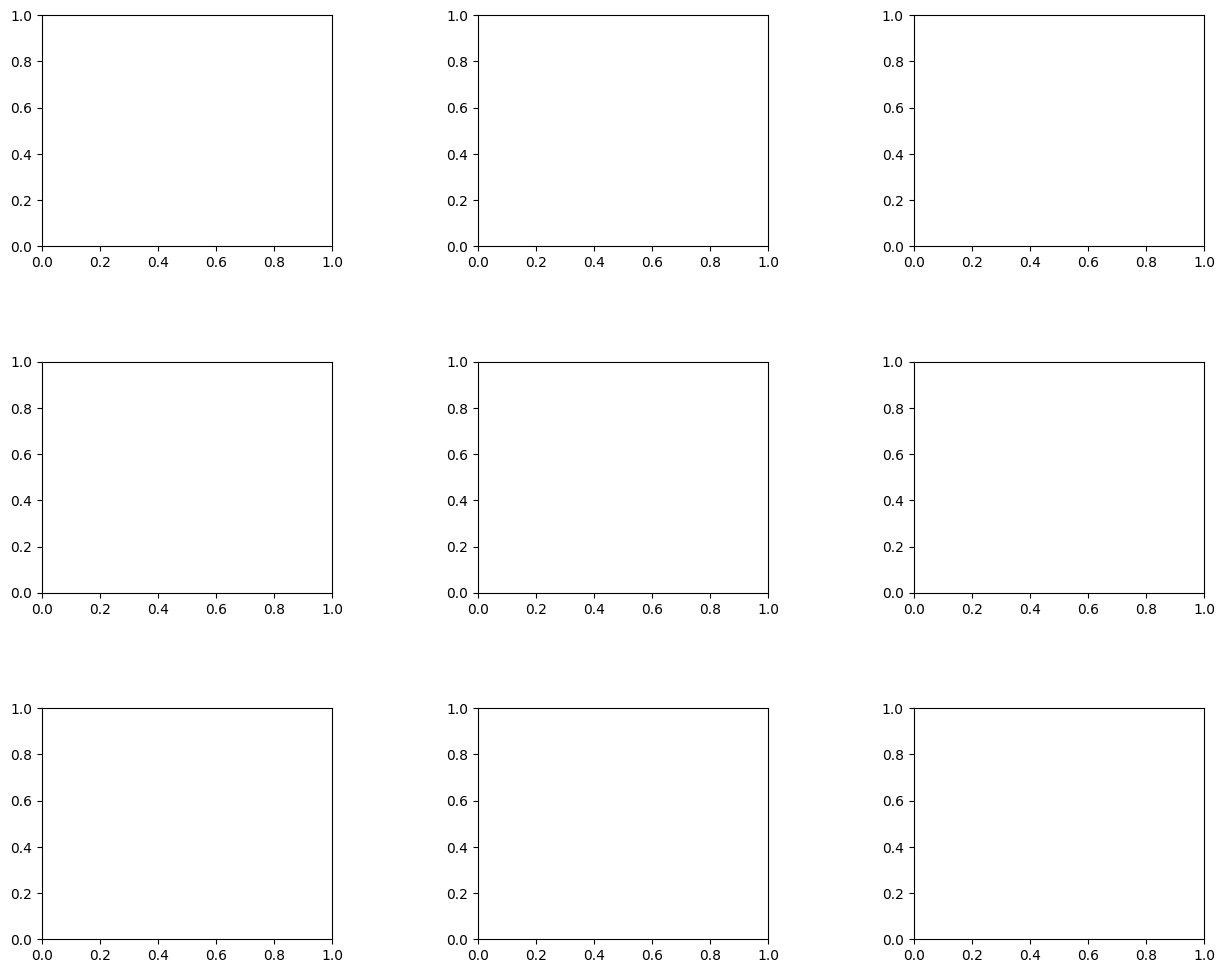

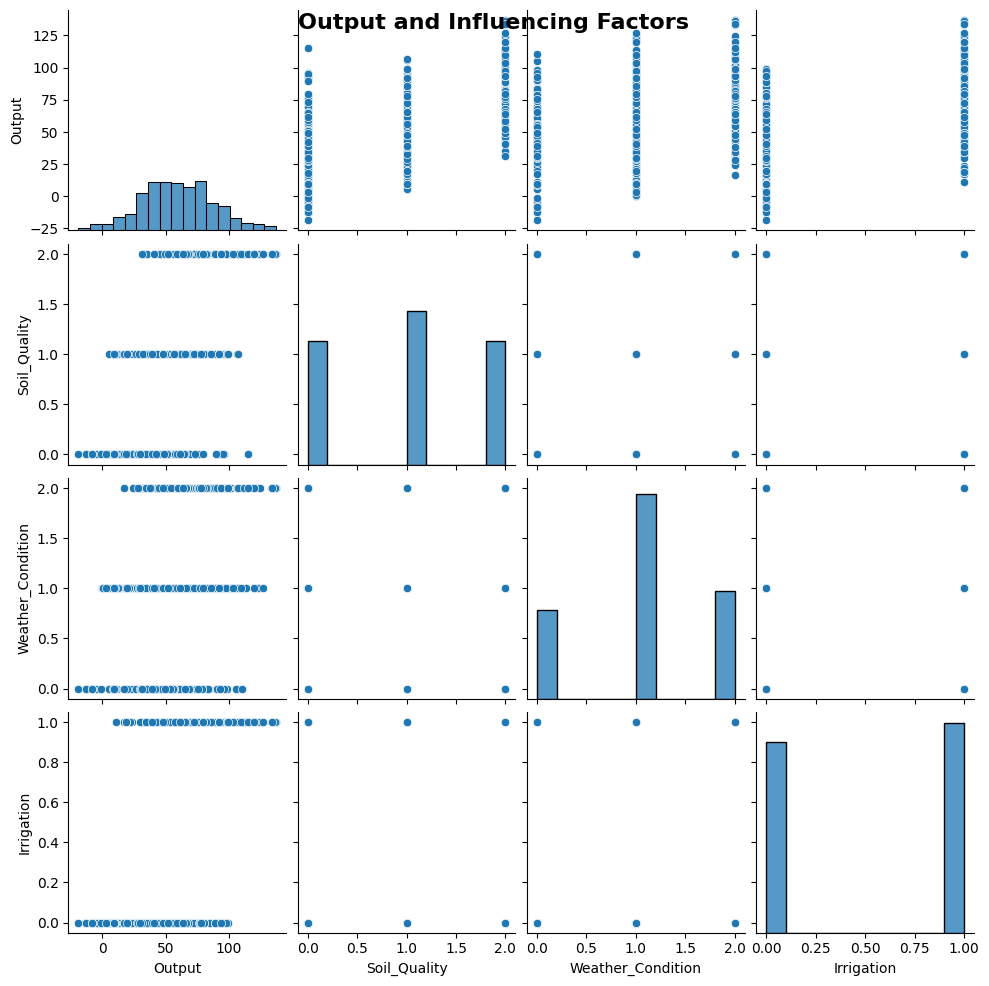

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)

# Simulating synthetic data
n_samples = 500

# Simulating features
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
temperature = np.random.uniform(10, 35, size=n_samples)
rainfall = np.random.uniform(300, 1200, size=n_samples)

# Simulating output (with some randomness)
output = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
          + np.random.normal(0, 10, size=n_samples))

# Creating a DataFrame
df = pd.DataFrame({
    'Soil_Quality': soil_quality,
    'Weather_Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Output': output
})

# Display the first few rows
print(df.head())

# Define SEM model
model_desc = """
# Measurement model
Health =~ Soil_Quality + Temperature + Rainfall
Result   =~ Output

# Structural model
Result ~ Health + Weather_Condition + Irrigation + Fertilizer
"""

# Create and fit the model
model = Model(model_desc)
model.fit(df)

# Get model results
results = model.inspect()

# Print the structure of results to inspect it
print("Structure of results:\n", results)

# Extract the model parameters, using a safe method to ensure the key exists
params = results.get('parameters', None)

# Check if parameters are present
if params is not None:
    print("Model Parameters:\n", params)
else:
    print("No 'parameters' key found in results. Please inspect the structure of the results.")

# Create subplots for 9 charts (3x3 grid, making sure all 9 spots are used)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid of subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between plots

# 1. Pairplot - Place this separately as it can't be used in ax argument
sns.pairplot(df[['Output', 'Soil_Quality', 'Weather_Condition', 'Irrigation']], palette='Set1')
plt.suptitle('Output and Influencing Factors', fontsize=16, fontweight='bold')
plt.show()

# 2. Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, ax=axs[0, 0])

# 3. Distribution of Output
sns.histplot(df['Output'], bins=30, kde=True, color='darkblue', ax=axs[0, 1])

# 4. Boxplot for Soil Quality vs Output
sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Set2', ax=axs[0, 2])

# 5. Scatter Plot: Output vs Temperature
sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato', ax=axs[1, 0])

# 6. Scatter Plot: Output vs Rainfall
sns.scatterplot(x='Rainfall', y='Output', data=df, color='green', ax=axs[1, 1])

# 7. Histogram for Soil Quality Distribution
sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple', ax=axs[1, 2])

# 8. Boxplot for Weather Condition vs Output
sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='coolwarm', ax=axs[2, 0])

# 9. Scatter Plot: Output vs Irrigation
sns.scatterplot(x='Irrigation', y='Output', data=df, color='indianred', ax=axs[2, 1])

# Apply bold formatting to the axis labels
for ax in axs.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')

# Remove the empty subplot at position (2, 2)
axs[2, 2].axis('off')

# Show the combined plots
plt.show()

### Dynamic Interpretation:

# Proceed with interpretation if parameters exist
if params is not None:
    interpretation = []

    # Example dynamic interpretation
    if 'Health ~ Soil_Quality' in params.index:
        health_soil_quality = params.loc['Health ~ Soil_Quality', 'Estimate']
        if health_soil_quality > 0:
            interpretation.append(f'Soil Quality positively influences the Health factor (Estimate: {health_soil_quality:.2f}).')
        else:
            interpretation.append(f'Soil Quality negatively influences the Health factor (Estimate: {health_soil_quality:.2f}).')

    if 'Result ~ Health' in params.index:
        health_result = params.loc['Result ~ Health', 'Estimate']
        if health_result > 0:
            interpretation.append(f'Health factor positively influences the Result (Estimate: {health_result:.2f}).')
        else:
            interpretation.append(f'Health factor negatively influences the Result (Estimate: {health_result:.2f}).')

    if 'Result ~ Weather_Condition' in params.index:
        weather_condition_result = params.loc['Result ~ Weather_Condition', 'Estimate']
        if weather_condition_result > 0:
            interpretation.append(f'Weather Condition positively influences the Result (Estimate: {weather_condition_result:.2f}).')
        else:
            interpretation.append(f'Weather Condition negatively influences the Result (Estimate: {weather_condition_result:.2f}).')

    if 'Result ~ Irrigation' in params.index:
        irrigation_result = params.loc['Result ~ Irrigation', 'Estimate']
        if irrigation_result > 0:
            interpretation.append(f'Irrigation positively influences the Result (Estimate: {irrigation_result:.2f}).')
        else:
            interpretation.append(f'Irrigation negatively influences the Result (Estimate: {irrigation_result:.2f}).')

    if 'Result ~ Fertilizer' in params.index:
        fertilizer_result = params.loc['Result ~ Fertilizer', 'Estimate']
        if fertilizer_result > 0:
            interpretation.append(f'Fertilizer positively influences the Result (Estimate: {fertilizer_result:.2f}).')
        else:
            interpretation.append(f'Fertilizer negatively influences the Result (Estimate: {fertilizer_result:.2f}).')

    # Display dynamic interpretation
    for statement in interpretation:
        print(statement)


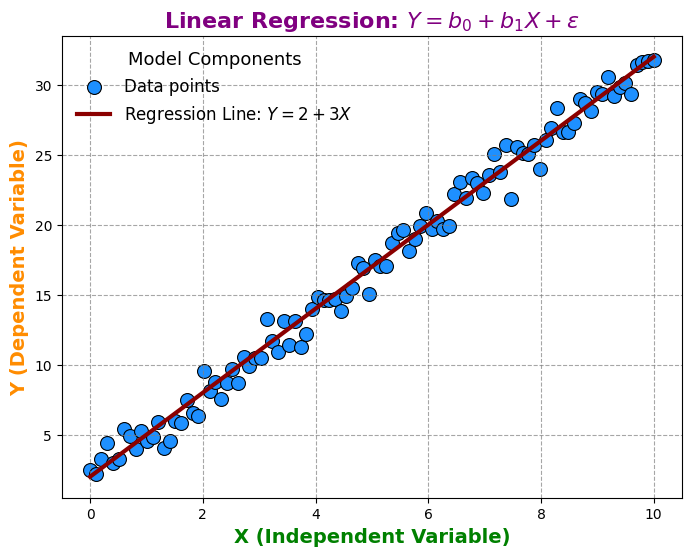

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n_samples = 100
X = np.linspace(0, 10, n_samples)  # Independent variable (X)
b0 = 2  # Intercept
b1 = 3  # Coefficient
epsilon = np.random.normal(0, 1, n_samples)  # Error term (normally distributed noise)
Y = b0 + b1 * X + epsilon  # Dependent variable (Y)

# Create a scatter plot and plot the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=Y, color='dodgerblue', label='Data points', s=100, edgecolor='black')

# Regression line (without error term)
plt.plot(X, b0 + b1 * X, color='darkred', linewidth=3, label=f'Regression Line: $Y = {b0} + {b1}X$')

# Add labels and title with bold text
plt.title('Linear Regression: $Y = b_0 + b_1X + \epsilon$', fontsize=16, fontweight='bold', color='purple')
plt.xlabel('X (Independent Variable)', fontsize=14, fontweight='bold', color='green')
plt.ylabel('Y (Dependent Variable)', fontsize=14, fontweight='bold', color='darkorange')

# Show legend with colorful labels
plt.legend(title='Model Components', fontsize=12, title_fontsize='13', loc='upper left', frameon=False)

# Display grid and add gridlines in light gray
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Show the plot
plt.show()


   Soil_Quality  Weather_Condition  Irrigation  Fertilizer  Temperature  \
0             1                  1           0           0    16.542642   
1             2                  1           1           0    16.174470   
2             2                  1           1           0    32.656365   
3             1                  2           1           0    16.238655   
4             0                  1           1           0    16.798743   

      Rainfall     Output  
0  1044.767030  45.599364  
1   988.075015  91.170059  
2   816.176056  91.835693  
3  1160.442429  66.340443  
4   480.427064  57.119440  


Model Results:
             lval  op               rval      Estimate     Std. Err    z-value  \
0         Result   ~             Health     20.555269    59.001618   0.348385   
1         Result   ~  Weather_Condition     14.418642     0.622666  23.156301   
2         Result   ~         Irrigation     29.193832     0.871598  33.494625   
3         Result   ~         Fertilizer     24.291826     0.957093  25.380843   
4   Soil_Quality   ~             Health      1.000000            -          -   
5    Temperature   ~             Health      0.081255     0.470858   0.172568   
6       Rainfall   ~             Health     -0.945669    11.379595  -0.083102   
7         Output   ~             Result      1.000000            -          -   
8         Health  ~~             Health      0.592434     1.700887   0.348309   
9         Result  ~~             Result      0.142409   359.244523   0.000396   
10        Output  ~~             Output     84.476137   359.244523   0.235149   
11      Rain

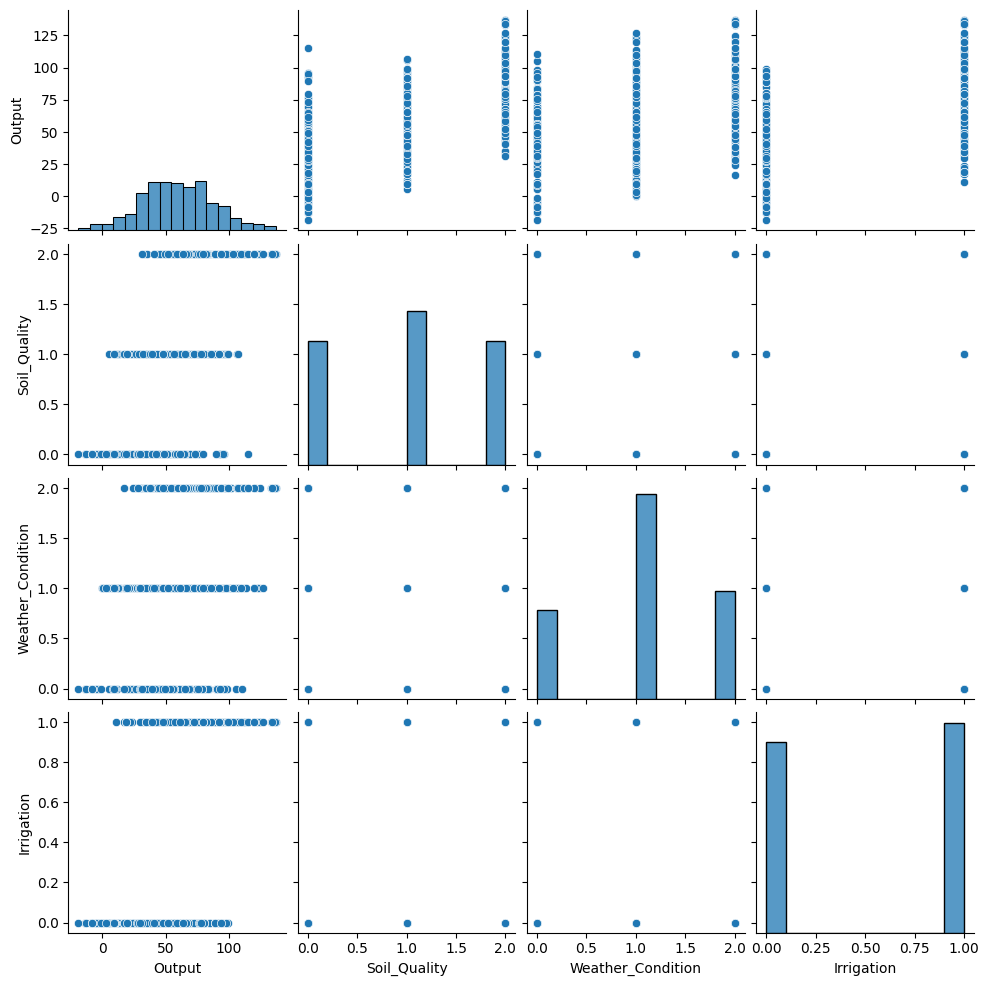

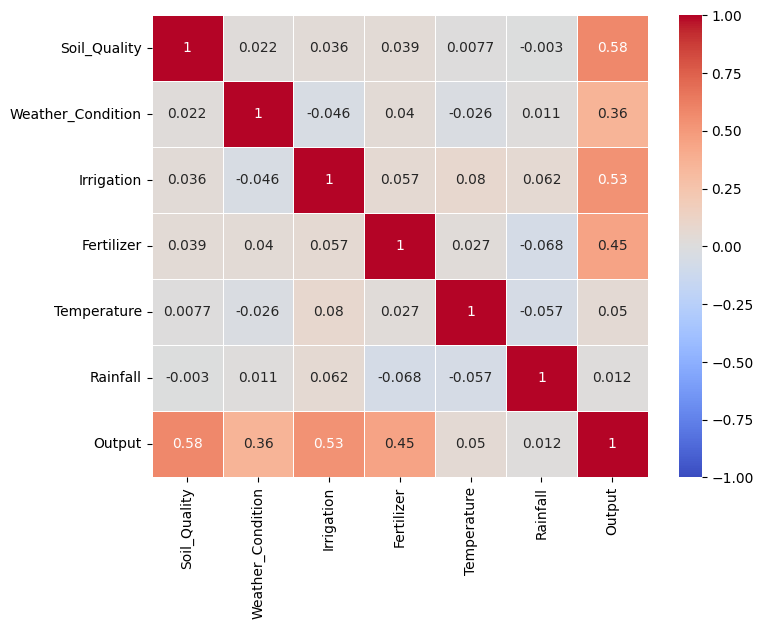

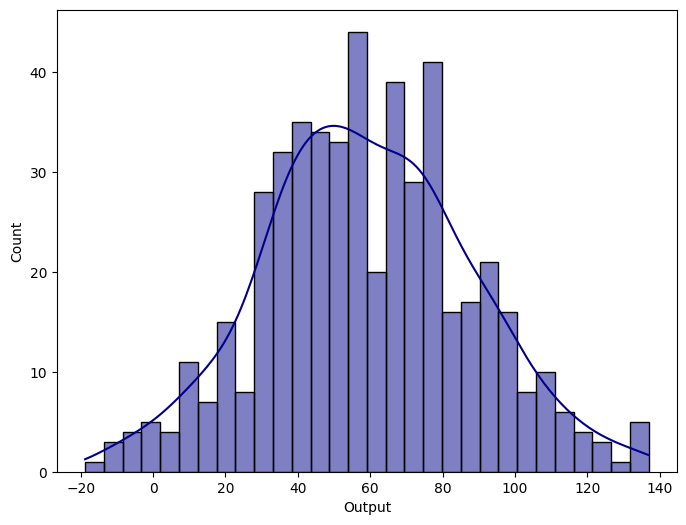

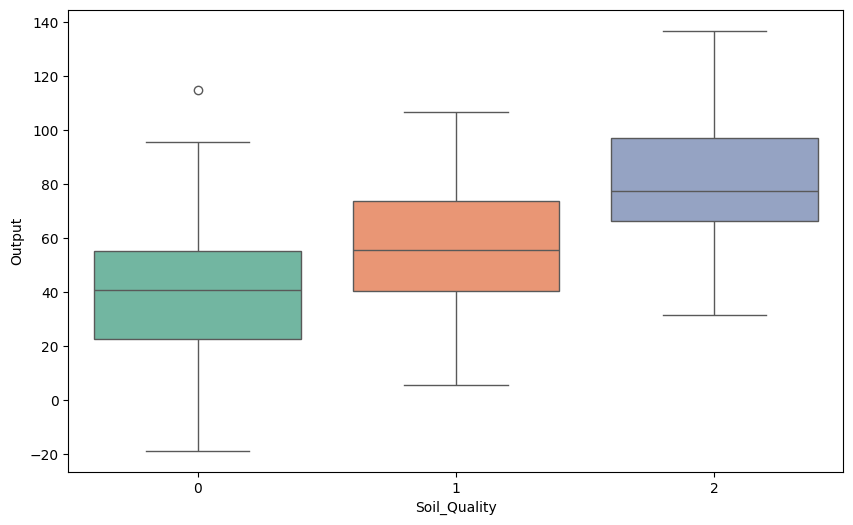

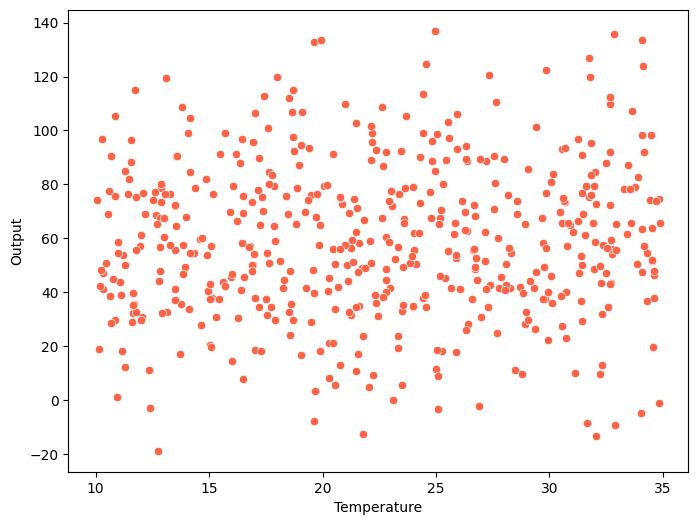

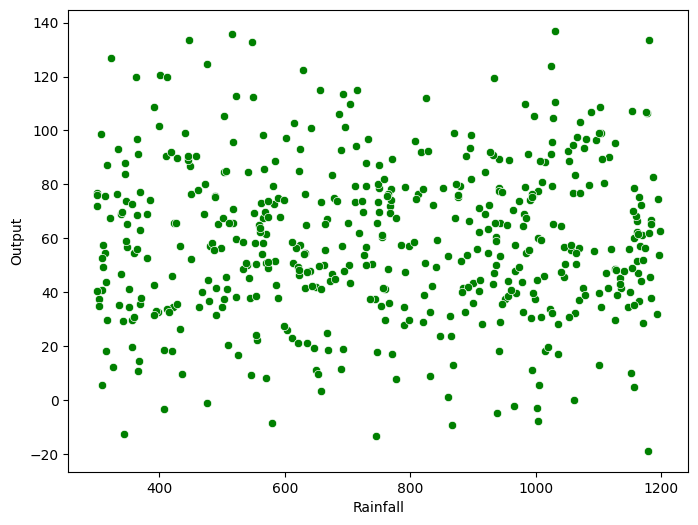

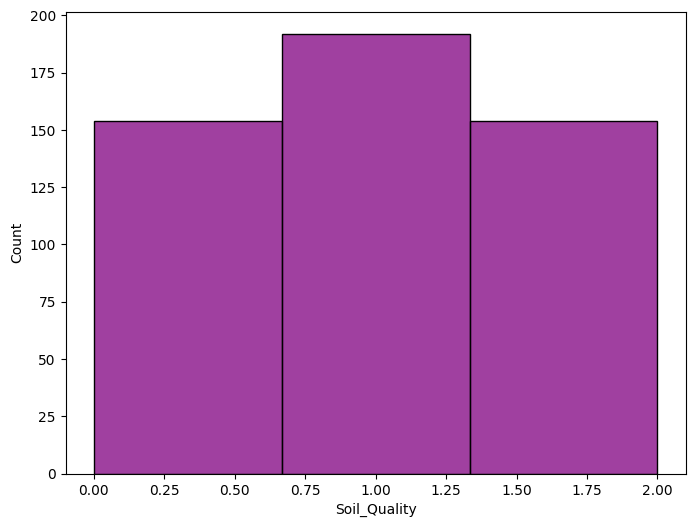

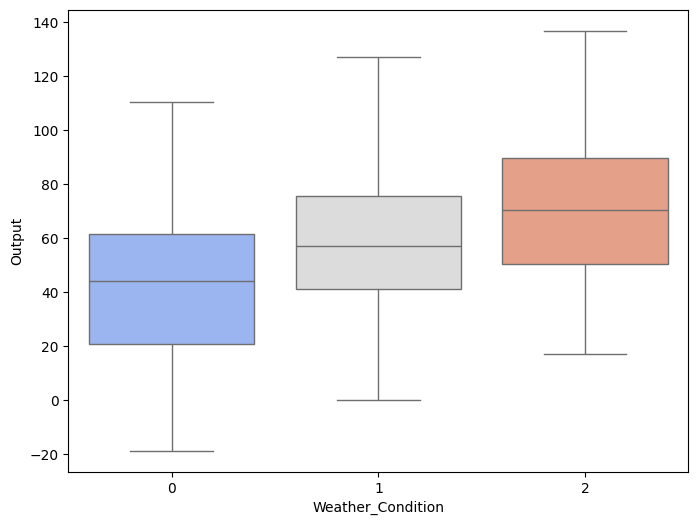

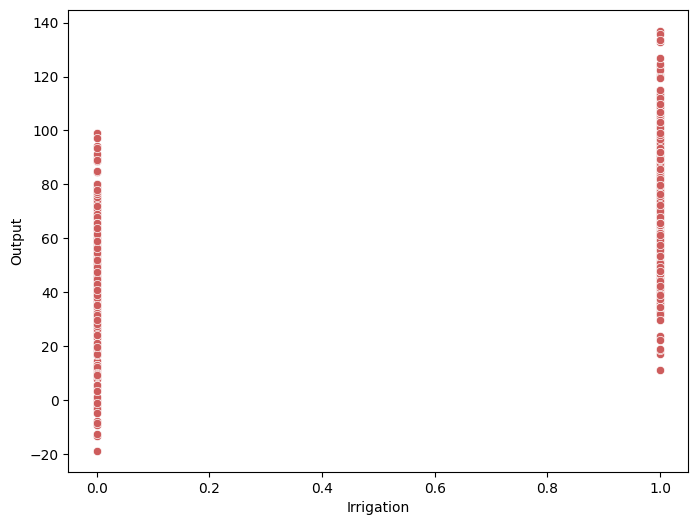

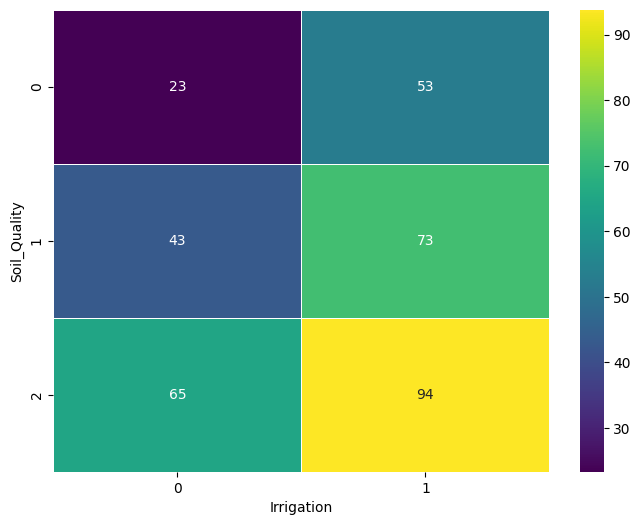

KeyError: 'coefficients'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set a seed for reproducibility
np.random.seed(42)

# Simulating synthetic data
n_samples = 500

# Simulating features
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
temperature = np.random.uniform(10, 35, size=n_samples)
rainfall = np.random.uniform(300, 1200, size=n_samples)

# Simulating output (with some randomness)
output = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
          + np.random.normal(0, 10, size=n_samples))

# Creating a DataFrame
df = pd.DataFrame({
    'Soil_Quality': soil_quality,
    'Weather_Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Output': output
})

# Display the first few rows
print(df.head())

# Define SEM model
model_desc = """
# Measurement model
Health =~ Soil_Quality + Temperature + Rainfall
Result   =~ Output

# Structural model
Result ~ Health + Weather_Condition + Irrigation + Fertilizer
"""

# Create and fit the model
model = Model(model_desc)
model.fit(df)

# Get model results
results = model.inspect()
print("Model Results:\n", results)

# Visualizations
sns.pairplot(df[['Output', 'Soil_Quality', 'Weather_Condition', 'Irrigation']], palette='Set1')
plt.show()

# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.show()

# Distribution of Output
plt.figure(figsize=(8, 6))
sns.histplot(df['Output'], bins=30, kde=True, color='darkblue')
plt.show()

# Boxplot for Soil Quality vs Output
plt.figure(figsize=(10, 6))
sns.boxplot(x='Soil_Quality', y='Output', data=df, palette='Set2')
plt.show()

# Scatter Plot: Output vs Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Output', data=df, color='tomato')
plt.show()

# Scatter Plot: Output vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rainfall', y='Output', data=df, color='green')
plt.show()

# Histogram for Soil Quality Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Soil_Quality'], bins=3, kde=False, color='purple')
plt.show()

# Boxplot for Weather Condition vs Output
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weather_Condition', y='Output', data=df, palette='coolwarm')
plt.show()

# Scatter Plot: Output vs Irrigation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Irrigation', y='Output', data=df, color='indianred')
plt.show()

# Heatmap: Output vs Soil Quality & Irrigation (Pivoted)
pivot_df = df.pivot_table(index='Soil_Quality', columns='Irrigation', values='Output', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='viridis', linewidths=0.5)
plt.show()

### Dynamic Interpretation:

# Extract coefficients from the model results
coefficients = results['coefficients']

# General Interpretation
interpretation = []

# Example dynamic interpretation
if coefficients.loc['Result ~ Health', 'Estimate'] > 0:
    interpretation.append('Health factor positively influences the output.')
else:
    interpretation.append('Health factor has a negative impact on the output.')

if coefficients.loc['Result ~ Weather_Condition', 'Estimate'] > 0:
    interpretation.append('Weather condition positively influences the output.')
else:
    interpretation.append('Weather condition has a negative impact on the output.')

if coefficients.loc['Result ~ Irrigation', 'Estimate'] > 0:
    interpretation.append('Irrigation positively influences the output.')
else:
    interpretation.append('Irrigation has a negative impact on the output.')

if coefficients.loc['Result ~ Fertilizer', 'Estimate'] > 0:
    interpretation.append('Fertilizer positively influences the output.')
else:
    interpretation.append('Fertilizer has a negative impact on the output.')

# Display dynamic interpretation
for statement in interpretation:
    print(statement)


Model Results:
             lval  op               rval      Estimate     Std. Err    z-value  \
0          Yield   ~         SoilHealth     20.555269    59.001618   0.348385   
1          Yield   ~  Weather_Condition     14.418642     0.622666  23.156301   
2          Yield   ~         Irrigation     29.193832     0.871598  33.494625   
3          Yield   ~         Fertilizer     24.291826     0.957093  25.380843   
4   Soil_Quality   ~         SoilHealth      1.000000            -          -   
5    Temperature   ~         SoilHealth      0.081255     0.470858   0.172568   
6       Rainfall   ~         SoilHealth     -0.945669    11.379595  -0.083102   
7     Crop_Yield   ~              Yield      1.000000            -          -   
8     SoilHealth  ~~         SoilHealth      0.592434     1.700887   0.348309   
9          Yield  ~~              Yield      0.142409   359.244523   0.000396   
10    Crop_Yield  ~~         Crop_Yield     84.476137   359.244523   0.235149   
11      Rain

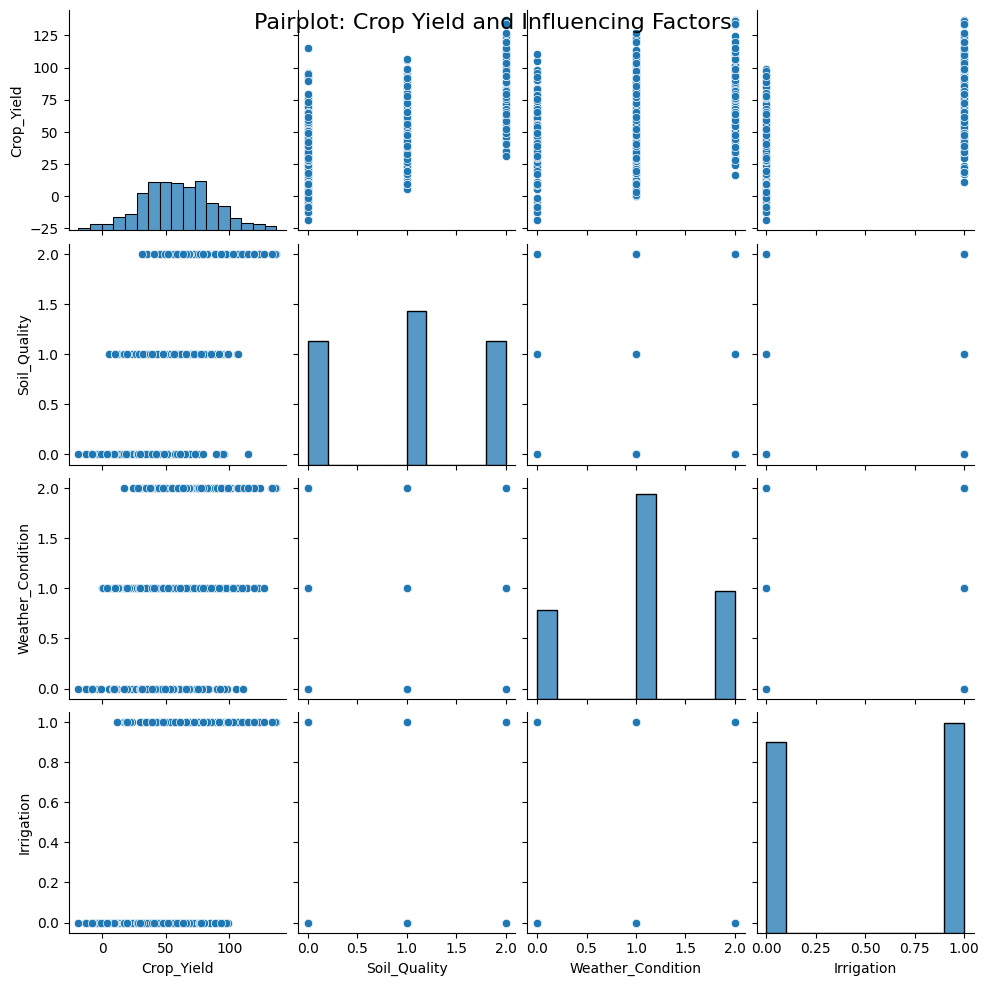

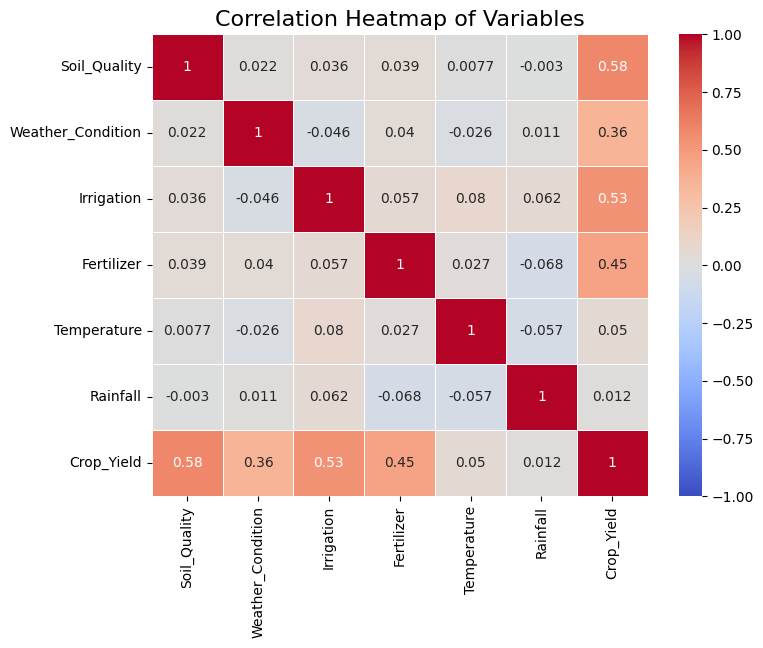

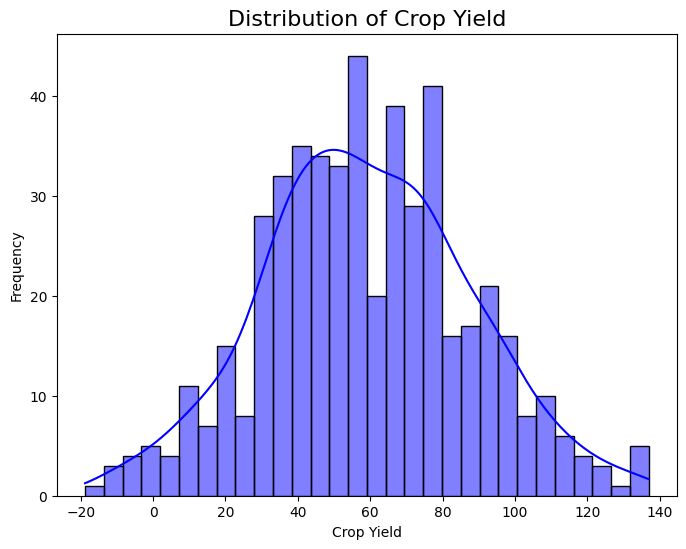

C:\Users\rudra\AppData\Local\Temp\ipykernel_17364\3997479188.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil_Quality', y='Crop_Yield', data=df, palette='Set2')


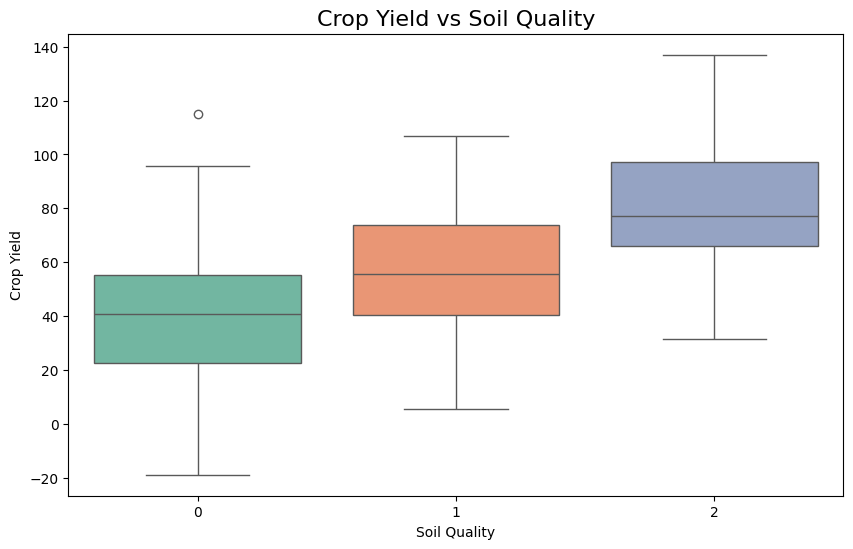

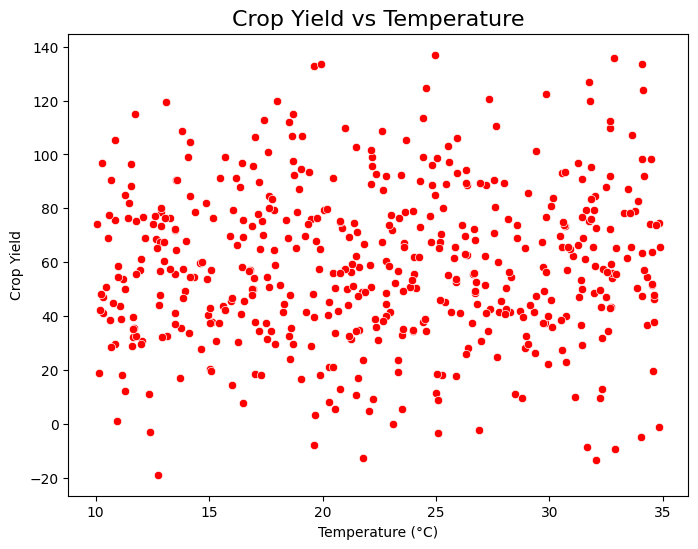

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model

# Set a seed for reproducibility
np.random.seed(42)

# Simulating synthetic data for use in Model 1
n_samples = 500

# Simulating features (soil quality, weather, irrigation, etc.)
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])  # Soil Quality: 0 (Poor), 1 (Average), 2 (Good)
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])  # Weather: 0 (Dry), 1 (Normal), 2 (Wet)
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Irrigation: 0 (None), 1 (Drip)
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Fertilizer: 0 (None), 1 (Applied)
temperature = np.random.uniform(10, 35, size=n_samples)  # Temperature in Celsius
rainfall = np.random.uniform(300, 1200, size=n_samples)  # Rainfall in mm

# Simulating crop yield (with some randomness)
crop_yield = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

# Creating a DataFrame for the model
df = pd.DataFrame({
    'Soil_Quality': soil_quality,
    'Weather_Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Crop_Yield': crop_yield
})

# Define SEM model for crop yield prediction
model_desc = """
# Measurement model
SoilHealth =~ Soil_Quality + Temperature + Rainfall
Yield   =~ Crop_Yield

# Structural model
Yield ~ SoilHealth + Weather_Condition + Irrigation + Fertilizer
"""

# Create and fit the model
model = Model(model_desc)
model.fit(df)

# Get model results
results = model.inspect()
print("Model Results:\n", results)

# 1. Pairplot: Visualizing relationships between key variables
sns.pairplot(df[['Crop_Yield', 'Soil_Quality', 'Weather_Condition', 'Irrigation']])
plt.suptitle('Pairplot: Crop Yield and Influencing Factors', fontsize=16)
plt.show()

# 2. Correlation Heatmap: To observe correlations between features
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Variables', fontsize=16)
plt.show()

# 3. Distribution of Crop Yield: To show the spread of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Crop_Yield'], bins=30, kde=True, color='blue')
plt.title('Distribution of Crop Yield', fontsize=16)
plt.xlabel('Crop Yield')
plt.ylabel('Frequency')
plt.show()

# 4. Boxplots: Distribution of crop yield based on categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Soil_Quality', y='Crop_Yield', data=df, palette='Set2')
plt.title('Crop Yield vs Soil Quality', fontsize=16)
plt.xlabel('Soil Quality')
plt.ylabel('Crop Yield')
plt.show()

# 5. Scatter Plot: Crop Yield vs Temperature (linear relationship)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Crop_Yield', data=df, color='red')
plt.title('Crop Yield vs Temperature', fontsize=16)
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Yield')
plt.show()


Model Results:
             lval  op               rval      Estimate     Std. Err    z-value  \
0          Yield   ~         SoilHealth     20.555269    59.001618   0.348385   
1          Yield   ~  Weather_Condition     14.418642     0.622666  23.156301   
2          Yield   ~         Irrigation     29.193832     0.871598  33.494625   
3          Yield   ~         Fertilizer     24.291826     0.957093  25.380843   
4   Soil_Quality   ~         SoilHealth      1.000000            -          -   
5    Temperature   ~         SoilHealth      0.081255     0.470858   0.172568   
6       Rainfall   ~         SoilHealth     -0.945669    11.379595  -0.083102   
7     Crop_Yield   ~              Yield      1.000000            -          -   
8     SoilHealth  ~~         SoilHealth      0.592434     1.700887   0.348309   
9          Yield  ~~              Yield      0.142409   359.244523   0.000396   
10    Crop_Yield  ~~         Crop_Yield     84.476137   359.244523   0.235149   
11      Rain

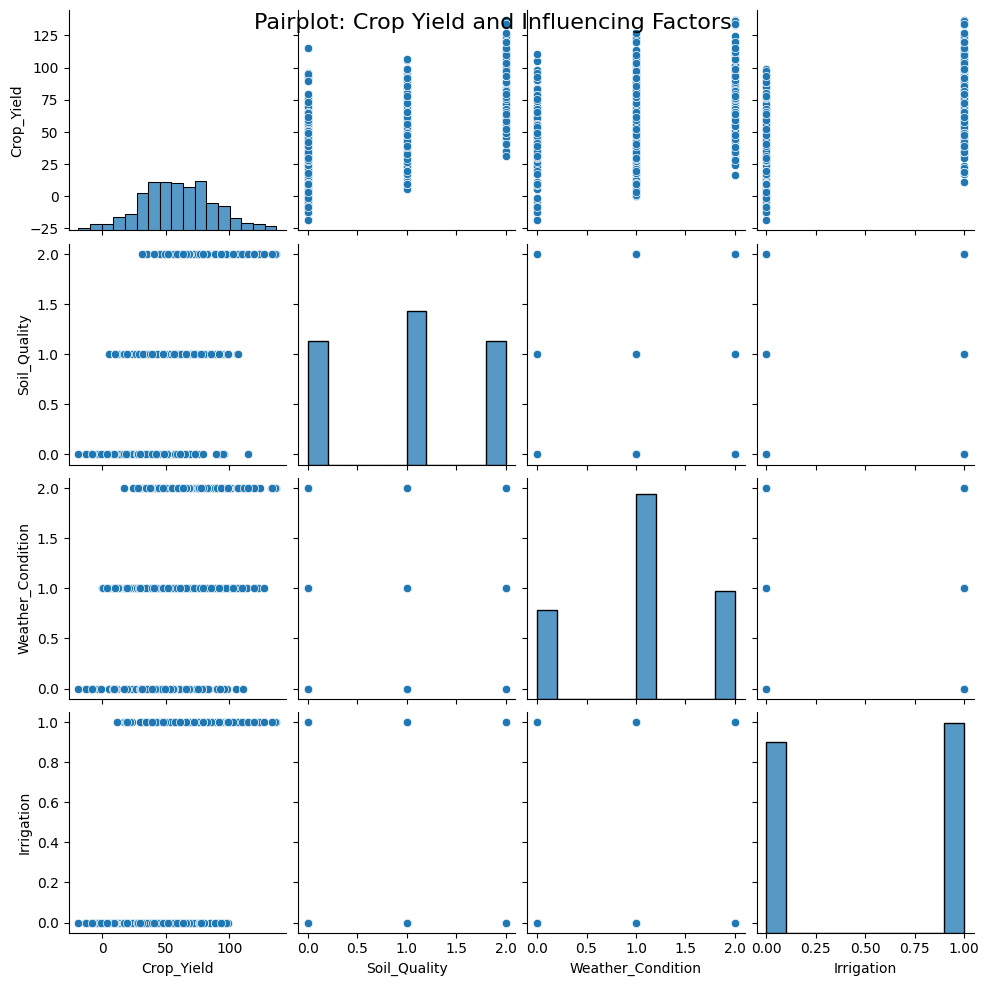

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model

# Set a seed for reproducibility
np.random.seed(42)

# Simulating synthetic data for use in Model 1
n_samples = 500

# Simulating features (soil quality, weather, irrigation, etc.)
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])  # Soil Quality: 0 (Poor), 1 (Average), 2 (Good)
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])  # Weather: 0 (Dry), 1 (Normal), 2 (Wet)
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Irrigation: 0 (None), 1 (Drip)
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Fertilizer: 0 (None), 1 (Applied)
temperature = np.random.uniform(10, 35, size=n_samples)  # Temperature in Celsius
rainfall = np.random.uniform(300, 1200, size=n_samples)  # Rainfall in mm

# Simulating crop yield (with some randomness)
crop_yield = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

# Creating a DataFrame for the model
df = pd.DataFrame({
    'Soil_Quality': soil_quality,
    'Weather_Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Crop_Yield': crop_yield
})

# Define SEM model for crop yield prediction
model_desc = """
# Measurement model
SoilHealth =~ Soil_Quality + Temperature + Rainfall
Yield   =~ Crop_Yield

# Structural model
Yield ~ SoilHealth + Weather_Condition + Irrigation + Fertilizer
"""

# Create and fit the model
model = Model(model_desc)
model.fit(df)

# Get model results
results = model.inspect()
print("Model Results:\n", results)

# Visualizing the results of the SEM
sns.pairplot(df[['Crop_Yield', 'Soil_Quality', 'Weather_Condition', 'Irrigation']])
plt.suptitle('Pairplot: Crop Yield and Influencing Factors', fontsize=16)
plt.show()


# Economic Impact of Agricultural Inputs on Profit and Yield (With Latent Variables)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model

# Set a seed for reproducibility
np.random.seed(42)

# Simulating synthetic data for Use Case 2
n_samples = 500

# Simulating features (fertilizer cost, pesticide cost, irrigation cost, etc.)
fertilizer_cost = np.random.uniform(20, 50, size=n_samples)  # Fertilizer cost
pesticide_cost = np.random.uniform(30, 60, size=n_samples)  # Pesticide cost
irrigation_cost = np.random.uniform(10, 30, size=n_samples)  # Irrigation cost

# Simulating crop yield (same as Model 1)
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
temperature = np.random.uniform(10, 35, size=n_samples)
rainfall = np.random.uniform(300, 1200, size=n_samples)

# Crop yield formula based on economic factors
crop_yield = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

# Calculating profit
profit = crop_yield * 1.5 - (fertilizer_cost + pesticide_cost + irrigation_cost + 50)

# Combine into a DataFrame for modeling
df = pd.DataFrame({
    'Soil Quality': soil_quality,
    'Weather Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Fertilizer Cost': fertilizer_cost,
    'Pesticide Cost': pesticide_cost,
    'Irrigation Cost': irrigation_cost,
    'Profit': profit
})

# Define SEM model for economic analysis
model_desc = """
# Measurement model
ManagementEfficiency =~ Fertilizer Cost + Pesticide Cost + Irrigation Cost
Profit   =~ Profit

# Structural model
Profit ~ ManagementEfficiency + Crop Yield
Crop Yield ~ Soil Quality + Weather Condition + Irrigation
"""

# Create and fit the model
model = Model(model_desc)
model.fit(df)

# Get model results
results = model.inspect()
print("Model Results:\n", results)

# Visualizing the results of the SEM
sns.pairplot(df[['Profit', 'Crop Yield', 'Irrigation Cost', 'Fertilizer Cost']])
plt.suptitle('Pairplot: Profit, Crop Yield, and Inputs', fontsize=16)
plt.show()

SyntaxError: Syntax error for line:
ManagementEfficiency =~ Fertilizer Cost + Pesticide Cost + Irrigation Cost (<string>)

In [3]:
## Economic Impact of Agricultural Inputs on Profit and Yield (With Latent Variables)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model

# Set a seed for reproducibility
np.random.seed(42)

# Simulating synthetic data for Use Case 2
n_samples = 50000

# Simulating features (fertilizer cost, pesticide cost, irrigation cost, etc.)
fertilizer_cost = np.random.uniform(20, 50, size=n_samples)  # Fertilizer cost
pesticide_cost = np.random.uniform(30, 60, size=n_samples)  # Pesticide cost
irrigation_cost = np.random.uniform(10, 30, size=n_samples)  # Irrigation cost

# Simulating crop yield (same as Model 1)
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
temperature = np.random.uniform(10, 35, size=n_samples)
rainfall = np.random.uniform(300, 1200, size=n_samples)

# Crop yield formula based on economic factors
crop_yield = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

# Calculating profit
profit = crop_yield * 1.5 - (fertilizer_cost + pesticide_cost + irrigation_cost + 50)

# Combine into a DataFrame for modeling
df = pd.DataFrame({
    'Soil Quality': soil_quality,
    'Weather Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Fertilizer Cost': fertilizer_cost,
    'Pesticide Cost': pesticide_cost,
    'Irrigation Cost': irrigation_cost,
    'Profit': profit
})

# Define SEM model for economic analysis
model_desc = """
# Measurement model
ManagementEfficiency =~ Fertilizer Cost + Pesticide Cost + Irrigation Cost
Profit   =~ Profit

# Structural model
Profit ~ ManagementEfficiency + Crop Yield
Crop Yield ~ Soil Quality + Weather Condition + Irrigation
"""

# Create and fit the model
model = Model(model_desc)
model.fit(df)

# Get model results
results = model.inspect()
print("Model Results:\n", results)

# Visualizing the results of the SEM
sns.pairplot(df[['Profit', 'Crop Yield', 'Irrigation Cost', 'Fertilizer Cost']])
plt.suptitle('Pairplot: Profit, Crop Yield, and Inputs', fontsize=16)
plt.show()


SyntaxError: Syntax error for line:
ManagementEfficiency =~ Fertilizer Cost + Pesticide Cost + Irrigation Cost (<string>)

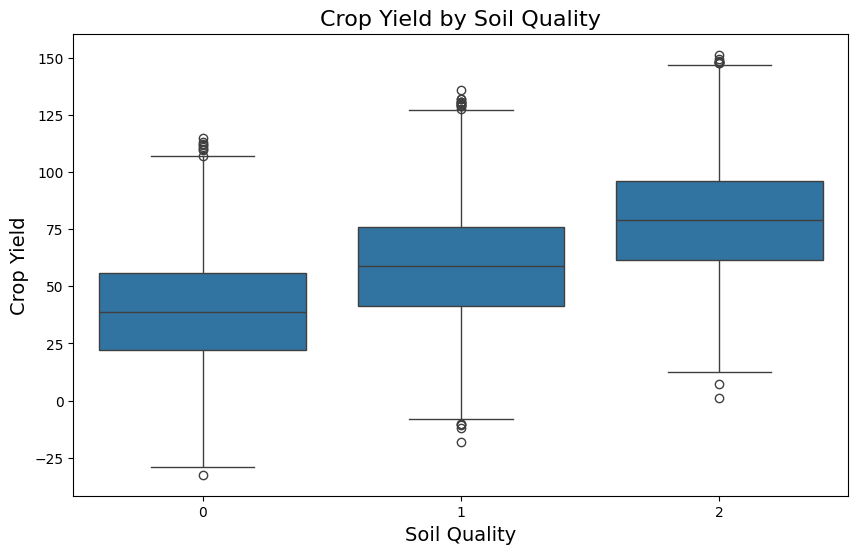

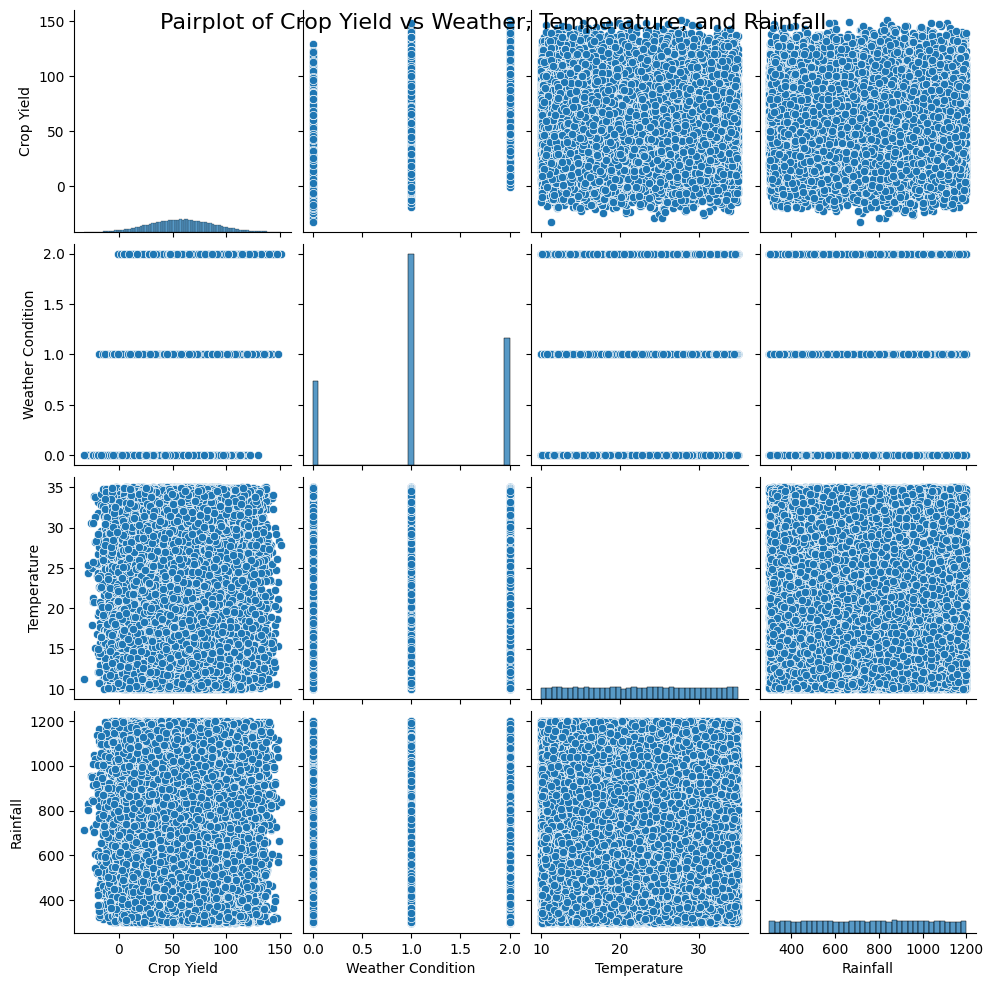

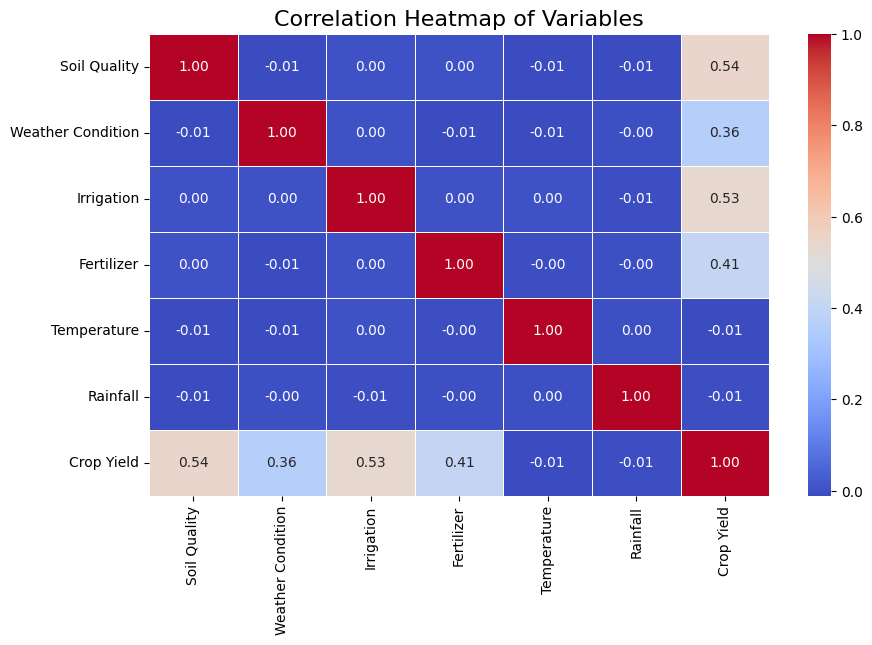

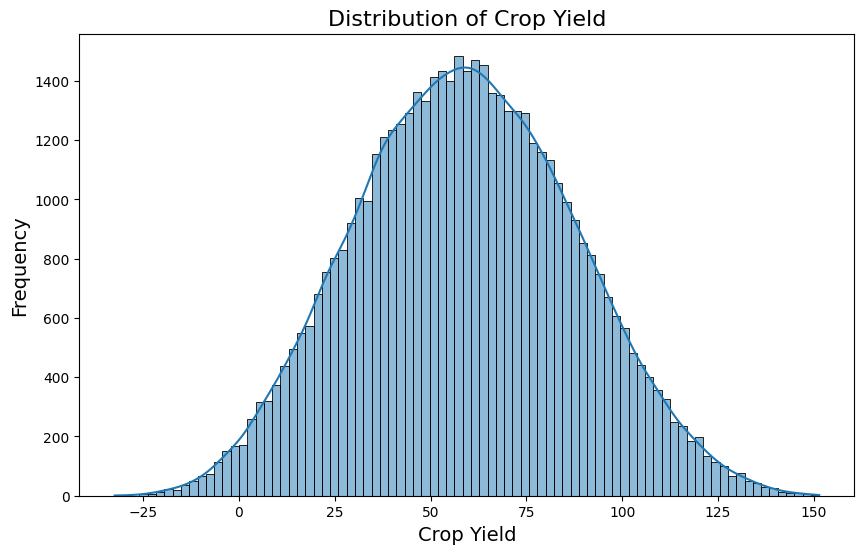

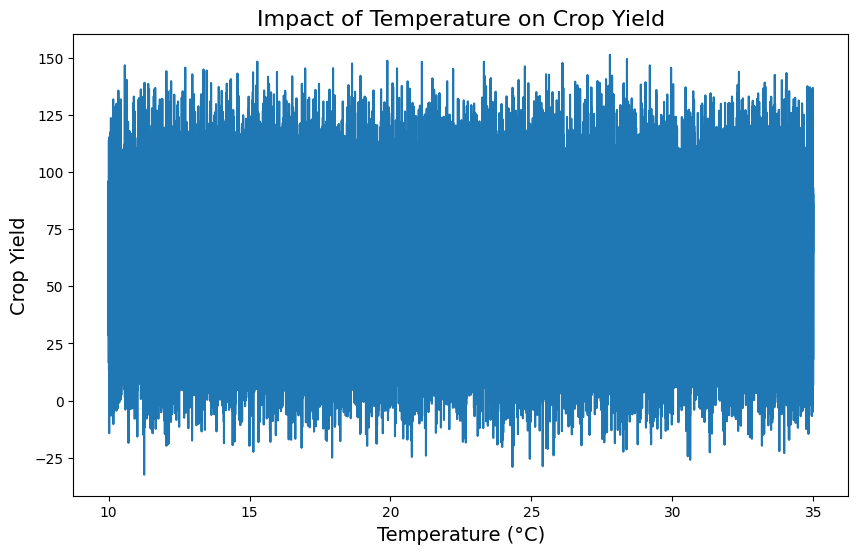

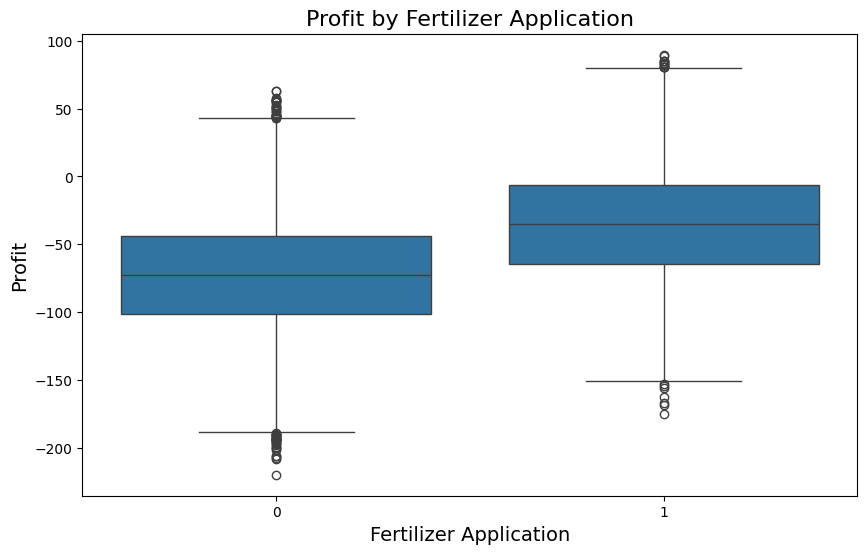

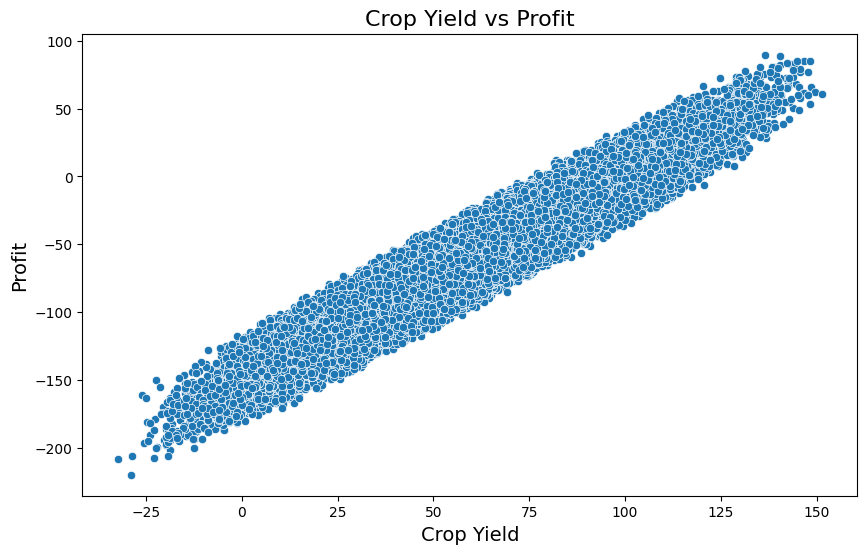

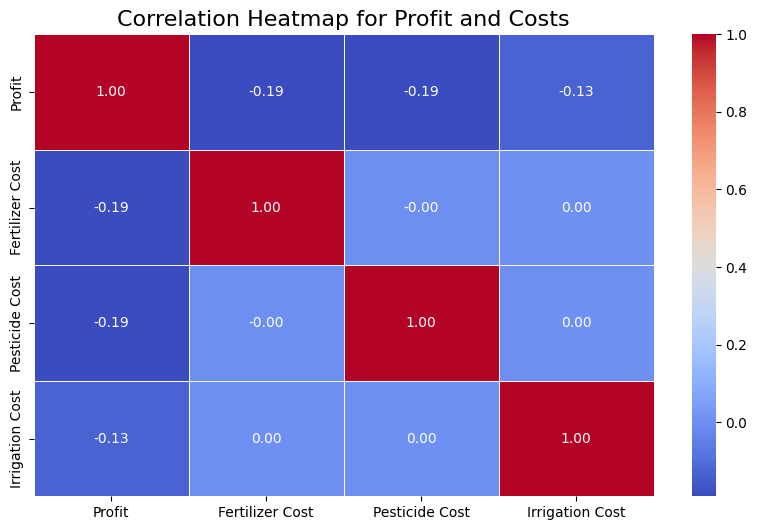

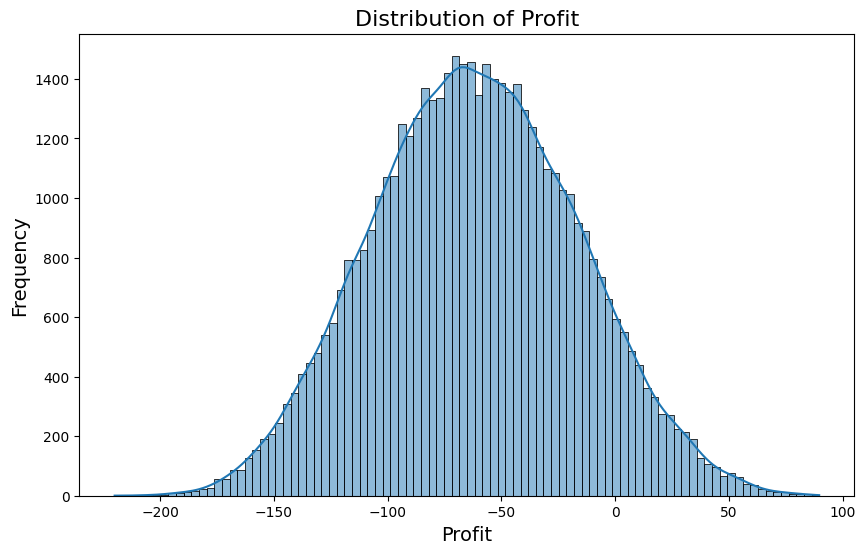

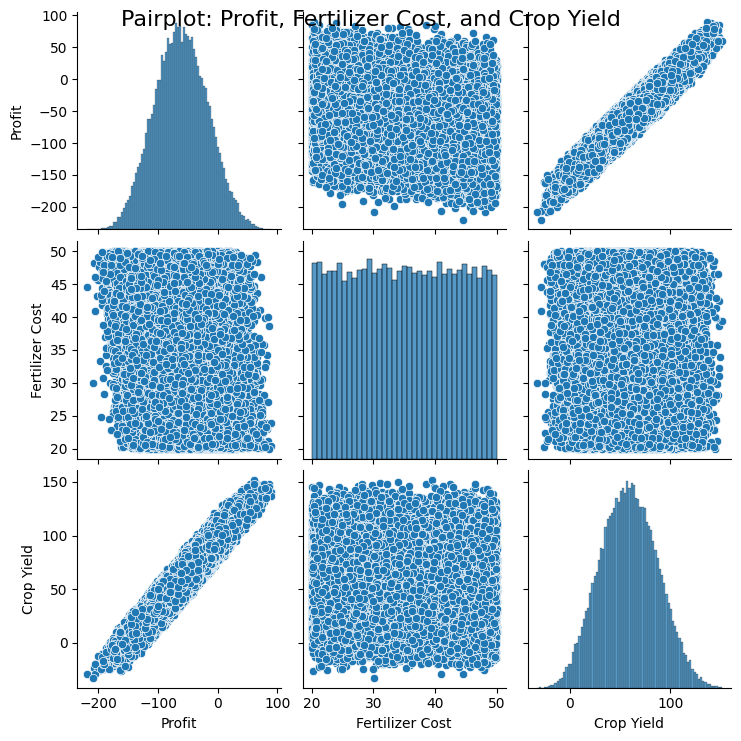

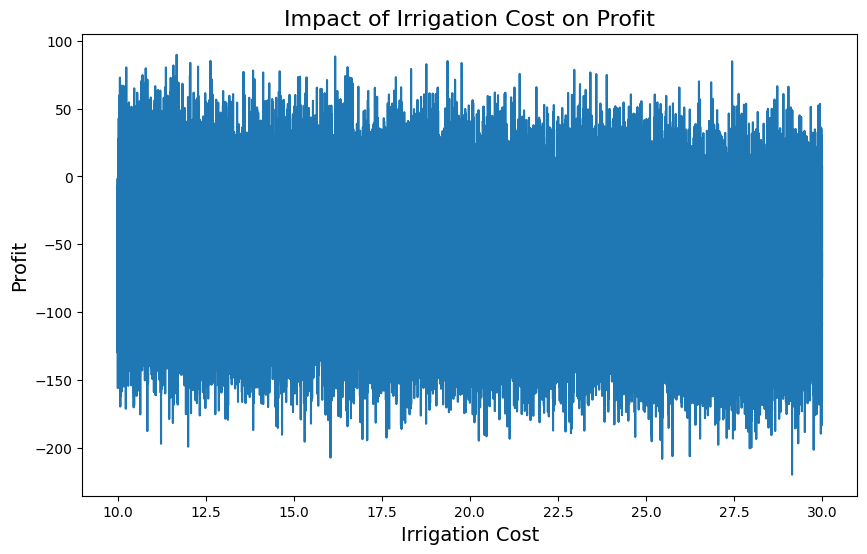

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from semopy import Model

# Set a seed for reproducibility
np.random.seed(42)

# Use Case 1: Crop Modeling and Soil-Crop Interaction
n_samples = 50000

# Simulate synthetic data for Use Case 1
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])  # Soil Quality: 0 (Poor), 1 (Average), 2 (Good)
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])  # Weather: 0 (Dry), 1 (Normal), 2 (Wet)
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Irrigation: 0 (None), 1 (Drip)
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Fertilizer: 0 (None), 1 (Applied)
temperature = np.random.uniform(10, 35, size=n_samples)  # Temperature in Celsius
rainfall = np.random.uniform(300, 1200, size=n_samples)  # Rainfall in mm

# Simulating crop yield based on soil quality, weather, irrigation, and temperature
crop_yield = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

# Combine into a DataFrame
df = pd.DataFrame({
    'Soil Quality': soil_quality,
    'Weather Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Crop Yield': crop_yield
})

# Visuals for Use Case 1

# 1. Boxplot of Crop Yield by Soil Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Soil Quality'], y=df['Crop Yield'])
plt.title('Crop Yield by Soil Quality', fontsize=16)
plt.xlabel('Soil Quality', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)
plt.show()

# 2. Pairplot to see relationships between Crop Yield and Weather Condition, Temperature, Rainfall
sns.pairplot(df[['Crop Yield', 'Weather Condition', 'Temperature', 'Rainfall']])
plt.suptitle('Pairplot of Crop Yield vs Weather, Temperature, and Rainfall', fontsize=16)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables', fontsize=16)
plt.show()

# 4. Histogram of Crop Yield
plt.figure(figsize=(10, 6))
sns.histplot(df['Crop Yield'], kde=True)
plt.title('Distribution of Crop Yield', fontsize=16)
plt.xlabel('Crop Yield', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 5. Line Plot: Crop Yield vs Temperature (showing impact of temperature)
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Temperature'], y=df['Crop Yield'])
plt.title('Impact of Temperature on Crop Yield', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)
plt.show()

# Use Case 2: Agro-Economic Systems Modeling
# Simulate economic factors affecting crop yield: costs, profit, and crop yield

fertilizer_cost = np.random.uniform(20, 50, size=n_samples)  # Fertilizer cost
pesticide_cost = np.random.uniform(30, 60, size=n_samples)  # Pesticide cost
irrigation_cost = np.random.uniform(10, 30, size=n_samples)  # Irrigation cost

# Simulating profit based on crop yield and cost variables
profit = crop_yield * 1.5 - (fertilizer_cost + pesticide_cost + irrigation_cost + 50)  # profit formula

df['Fertilizer Cost'] = fertilizer_cost
df['Pesticide Cost'] = pesticide_cost
df['Irrigation Cost'] = irrigation_cost
df['Profit'] = profit

# Visuals for Use Case 2

# 6. Boxplot of Profit by Fertilizer Application
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fertilizer'], y=df['Profit'])
plt.title('Profit by Fertilizer Application', fontsize=16)
plt.xlabel('Fertilizer Application', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

# 7. Scatter plot between Crop Yield and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Crop Yield'], y=df['Profit'])
plt.title('Crop Yield vs Profit', fontsize=16)
plt.xlabel('Crop Yield', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

# 8. Correlation Heatmap: Profit and Costs
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Profit', 'Fertilizer Cost', 'Pesticide Cost', 'Irrigation Cost']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Profit and Costs', fontsize=16)
plt.show()

# 9. Histogram of Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit', fontsize=16)
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 10. Pairplot to analyze relationship between Profit, Fertilizer Cost, and Crop Yield
sns.pairplot(df[['Profit', 'Fertilizer Cost', 'Crop Yield']])
plt.suptitle('Pairplot: Profit, Fertilizer Cost, and Crop Yield', fontsize=16)
plt.show()

# 11. Line Plot: Profit vs Irrigation Cost
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Irrigation Cost'], y=df['Profit'])
plt.title('Impact of Irrigation Cost on Profit', fontsize=16)
plt.xlabel('Irrigation Cost', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

# 12. Boxplot of Profit by Pesticide Application (Updated to Pesticide Cost)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Pesticide Cost'], y=df['Profit'])
plt.title('Profit by Pesticide Application', fontsize=16)
plt.xlabel('Pesticide Cost', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

# 13. Bar Plot: Average Profit by Region (assume different regions in agriculture)
df['Region'] = np.random.choice([0, 1, 2], size=n_samples)  # 0: North, 1: South, 2: Central
region_avg_profit = df.groupby('Region')['Profit'].mean()
plt.figure(figsize=(10, 6))
region_avg_profit.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Profit', fontsize=14)
plt.show()

# 14. SEM (Structural Equation Modeling): Simulate a Model for Crop Yield and Profit
sem_model = """
Crop_Yield ~ Soil_Quality + Weather_Condition + Irrigation + Fertilizer + Temperature + Rainfall
Profit ~ Crop_Yield + Fertilizer_Cost + Pesticide_Cost + Irrigation_Cost
"""

# Create the model and fit the data
model = Model(sem_model)
model.fit(df)

# Print the summary of the model
model.summary()

# 15. SEM Path Diagram
model.plot(figsize=(10, 6))
plt.title('Structural Equation Model Path Diagram', fontsize=16)
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from semopy import Model

# Set a seed for reproducibility
np.random.seed(42)

# Use Case 1: Crop Modeling and Soil-Crop Interaction
n_samples = 50000

# Simulate synthetic data for Use Case 1
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])  # Soil Quality: 0 (Poor), 1 (Average), 2 (Good)
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])  # Weather: 0 (Dry), 1 (Normal), 2 (Wet)
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Irrigation: 0 (None), 1 (Drip)
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Fertilizer: 0 (None), 1 (Applied)
temperature = np.random.uniform(10, 35, size=n_samples)  # Temperature in Celsius
rainfall = np.random.uniform(300, 1200, size=n_samples)  # Rainfall in mm

# Simulating crop yield based on soil quality, weather, irrigation, and temperature
crop_yield = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

# Combine into a DataFrame
df = pd.DataFrame({
    'Soil Quality': soil_quality,
    'Weather Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Crop Yield': crop_yield
})

# Visuals for Use Case 1

# 1. Boxplot of Crop Yield by Soil Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Soil Quality'], y=df['Crop Yield'])
plt.title('Crop Yield by Soil Quality', fontsize=16)
plt.xlabel('Soil Quality', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)
plt.show()

# 2. Pairplot to see relationships between Crop Yield and Weather Condition, Temperature, Rainfall
sns.pairplot(df[['Crop Yield', 'Weather Condition', 'Temperature', 'Rainfall']])
plt.suptitle('Pairplot of Crop Yield vs Weather, Temperature, and Rainfall', fontsize=16)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables', fontsize=16)
plt.show()

# 4. Histogram of Crop Yield
plt.figure(figsize=(10, 6))
sns.histplot(df['Crop Yield'], kde=True)
plt.title('Distribution of Crop Yield', fontsize=16)
plt.xlabel('Crop Yield', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 5. Line Plot: Crop Yield vs Temperature (showing impact of temperature)
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Temperature'], y=df['Crop Yield'])
plt.title('Impact of Temperature on Crop Yield', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)
plt.show()

# Use Case 2: Agro-Economic Systems Modeling
# Simulate economic factors affecting crop yield: costs, profit, and crop yield

fertilizer_cost = np.random.uniform(20, 50, size=n_samples)  # Fertilizer cost
pesticide_cost = np.random.uniform(30, 60, size=n_samples)  # Pesticide cost
irrigation_cost = np.random.uniform(10, 30, size=n_samples)  # Irrigation cost

# Simulating profit based on crop yield and cost variables
profit = crop_yield * 1.5 - (fertilizer_cost + pesticide_cost + irrigation_cost + 50)  # profit formula

df['Fertilizer Cost'] = fertilizer_cost
df['Pesticide Cost'] = pesticide_cost
df['Irrigation Cost'] = irrigation_cost
df['Profit'] = profit

# Visuals for Use Case 2

# 6. Boxplot of Profit by Fertilizer Application
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fertilizer'], y=df['Profit'])
plt.title('Profit by Fertilizer Application', fontsize=16)
plt.xlabel('Fertilizer Application', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

# 7. Scatter plot between Crop Yield and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Crop Yield'], y=df['Profit'])
plt.title('Crop Yield vs Profit', fontsize=16)
plt.xlabel('Crop Yield', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

# 8. Correlation Heatmap: Profit and Costs
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Profit', 'Fertilizer Cost', 'Pesticide Cost', 'Irrigation Cost']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Profit and Costs', fontsize=16)
plt.show()

# 9. Histogram of Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit', fontsize=16)
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 10. Pairplot to analyze relationship between Profit, Fertilizer Cost, and Crop Yield
sns.pairplot(df[['Profit', 'Fertilizer Cost', 'Crop Yield']])
plt.suptitle('Pairplot: Profit, Fertilizer Cost, and Crop Yield', fontsize=16)
plt.show()

# 11. Line Plot: Profit vs Irrigation Cost
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Irrigation Cost'], y=df['Profit'])
plt.title('Impact of Irrigation Cost on Profit', fontsize=16)
plt.xlabel('Irrigation Cost', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

# 12. Boxplot of Profit by Pesticide Application
# Example of updating visualizations to use 'Pesticide Cost' instead
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Pesticide Cost'], y=df['Profit'])
plt.title('Profit by Pesticide Application', fontsize=16)
plt.xlabel('Pesticide Cost', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()



# 13. Bar Plot: Average Profit by Region (assume different regions in agriculture)
df['Region'] = np.random.choice([0, 1, 2], size=n_samples)  # 0: North, 1: South, 2: Central
region_avg_profit = df.groupby('Region')['Profit'].mean()
plt.figure(figsize=(10, 6))
region_avg_profit.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Profit', fontsize=14)
plt.show()

# 14. SEM (Structural Equation Modeling): Simulate a Model for Crop Yield and Profit
# Update SEM model to use 'Pesticide Cost'
# 14. SEM (Structural Equation Modeling): Simulate a Model for Crop Yield and Profit
sem_model = """
Crop_Yield ~ Soil_Quality + Weather_Condition + Irrigation + Fertilizer + Temperature + Rainfall
Profit ~ Crop_Yield + Fertilizer_Cost + Pesticide_Cost + Irrigation_Cost
"""

# Create the model and fit the data
model = Model(sem_model)
model.fit(df)

# Print the summary of the model
model.summary()

# 15. SEM Path Diagram
model.plot(figsize=(10, 6))
plt.title('Structural Equation Model Path Diagram', fontsize=16)
plt.show()


# 15. SEM Path Diagram
model.plot(figsize=(10, 6))
plt.title('Structural Equation Model Path Diagram', fontsize=16)
plt.show()



SyntaxError: unterminated triple-quoted string literal (detected at line 169) (1711091721.py, line 157)

# Use Case 2: Agro-Economic Systems Modeling
Objective: Analyze how different agricultural inputs such as fertilizers, pesticide use, irrigation methods, and crop diseases affect crop yield and economic profitability.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model

# Set a seed for reproducibility
np.random.seed(42)

# Simulating synthetic data for Use Case 2
n_samples = 50000

# Simulating features (fertilizer cost, pesticide cost, irrigation cost, etc.)
fertilizer_cost = np.random.uniform(20, 50, size=n_samples)  # Fertilizer cost
pesticide_cost = np.random.uniform(30, 60, size=n_samples)  # Pesticide cost
irrigation_cost = np.random.uniform(10, 30, size=n_samples)  # Irrigation cost

# Simulating crop yield (same as Model 1)
soil_quality = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])
weather_condition = np.random.choice([0, 1, 2], size=n_samples, p=[0.2, 0.5, 0.3])
irrigation = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
fertilizer = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
temperature = np.random.uniform(10, 35, size=n_samples)
rainfall = np.random.uniform(300, 1200, size=n_samples)

# Crop yield formula based on economic factors
crop_yield = (soil_quality * 20 + weather_condition * 15 + irrigation * 30 + fertilizer * 25
              + np.random.normal(0, 10, size=n_samples))

# Calculating profit
profit = crop_yield * 1.5 - (fertilizer_cost + pesticide_cost + irrigation_cost + 50)

# Combine into a DataFrame for modeling
df = pd.DataFrame({
    'Soil Quality': soil_quality,
    'Weather Condition': weather_condition,
    'Irrigation': irrigation,
    'Fertilizer': fertilizer,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Fertilizer Cost': fertilizer_cost,
    'Pesticide Cost': pesticide_cost,
    'Irrigation Cost': irrigation_cost,
    'Profit': profit
})

# Define SEM model for economic analysis
model_desc = """
# Measurement model
ManagementEfficiency =~ Fertilizer Cost + Pesticide Cost + Irrigation Cost
Profit   =~ Profit

# Structural model
Profit ~ ManagementEfficiency + Crop Yield
Crop Yield ~ Soil Quality + Weather Condition + Irrigation
"""

# Create and fit the model
model = Model(model_desc)
model.fit(df)

# Get model results
results = model.inspect()
print("Model Results:\n", results)

# Visualizing the results of the SEM
sns.pairplot(df[['Profit', 'Crop Yield', 'Irrigation Cost', 'Fertilizer Cost']])
plt.suptitle('Pairplot: Profit, Crop Yield, and Inputs', fontsize=16)
plt.show()
